In [1]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
# import jupyter_black

# jupyter_black.load()

# Importing data

In [2]:
df=pd.read_excel("Flourishing_248_HD - Copy.xlsx")
df.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


## Checking basic info, missing values , shape and data types

In [3]:
df.shape

(248, 11)

In [4]:
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [6]:
di_sex = {2: "female", 1: "male"}
df.replace({"sex": di_sex},inplace=True)

di_famstatus = {2: "Separate / Divorced", 1: "Single",3:"Couple"}
df.replace({"famstatus": di_famstatus},inplace=True)

di_education = {2: "completed HS", 1: "not completed HS", 3:"upto 2Y after HS", 4:"upto 3Y after HS", 5:"upto 4Y after HS",6:"upto 5Y after HS" }
df.replace({"education": di_education},inplace=True)

di_pro = {2: "Moderately Mentally Healthy", 1: "Languishing",3:"Flourishing"}
df.replace({"pro_cat": di_pro},inplace=True)

di_priv = {2: "Moderately Mentally Healthy", 1: "Languishing",3:"Flourishing"}
df.replace({"priv_cat": di_priv},inplace=True)
# di_education = {2: "female", 1: "male"}
# df.replace({"sex": di_sex})

conditions = [(df['positivity'] < 1), (df['positivity'] >= 1) & (df['positivity'] < 2),
    (df['positivity'] >= 2) & (df['positivity'] < 3), (df['positivity'] >= 3)]

categories = ["depressed", "languishing", "moderately emotionally healthy", "emotionally flourishing"]
df["pos_cat"] = np.select(conditions, categories)

df.head()



,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
0,344,72,upto 5Y after HS,female,Separate / Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing
1,317,45,upto 5Y after HS,female,Separate / Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing
2,444,43,upto 4Y after HS,male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing
3,270,60,completed HS,female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing
4,52,49,completed HS,female,Separate / Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emotionally healthy


# Analysis

## Univariate

In [7]:
numerical_cols=["age","pro_quant","priv_quant","flow"]
categorical_cols=["education","sex","famstatus","pro_cat","priv_cat","pos_cat"]


### Categorical

In [27]:
def visualize_categorical_data(data, column_name):
    # Create summary table
    summary = pd.DataFrame(data[column_name].value_counts(normalize=True))
    summary.columns = ['Frequency']
    summary['Frequency'] = summary['Frequency'] * 100
    summary = summary.reset_index()
    summary.columns = ['Category', 'Frequency']
    summary = summary.sort_values('Frequency', ascending=False)

    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    # Generate a color palette
    colors = plt.cm.Set3(np.linspace(0, 1, len(summary)))

    # Bar plot
    sns.barplot(x='Category', y='Frequency', data=summary, ax=ax1, palette=colors)
    ax1.set_xlabel(column_name)
    ax1.set_ylabel("Frequency (%)")
    ax1.set_title(f"Bar Chart for {column_name}")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # Pie chart
    wedges, texts, autotexts = ax2.pie(summary['Frequency'], 
                                       labels=summary['Category'], 
                                       autopct='%1.1f%%', 
                                       colors=colors,
                                       startangle=90)
    ax2.set_title(f"Pie Chart for {column_name}")

    # Move the legend outside the pie chart
    ax2.legend(wedges, summary['Category'],
               title="Categories",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

    return summary

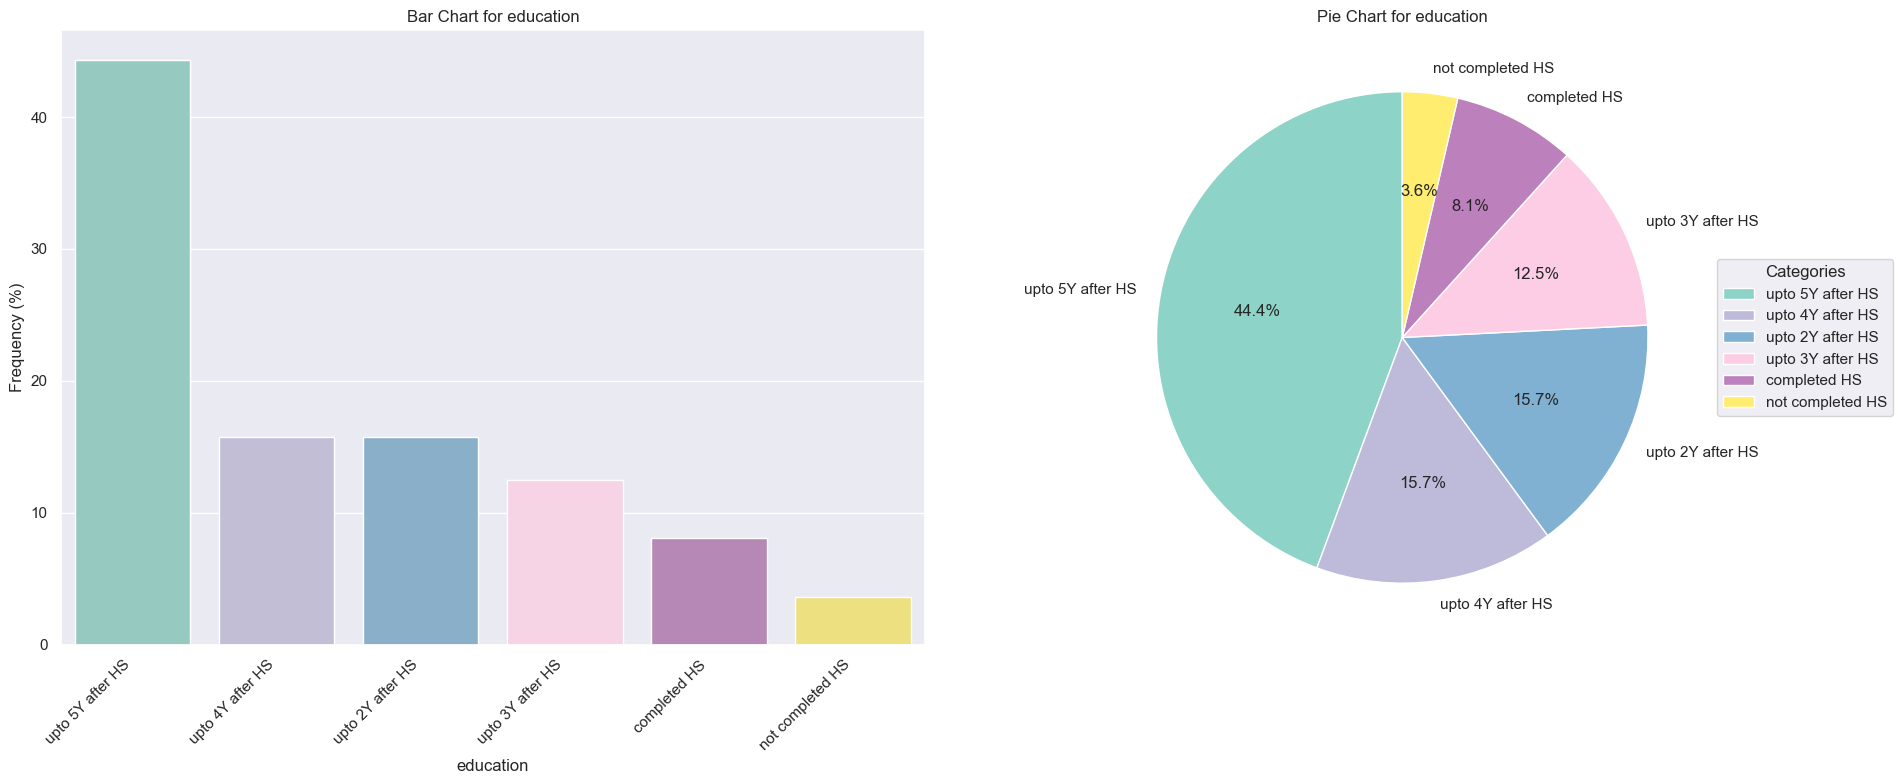

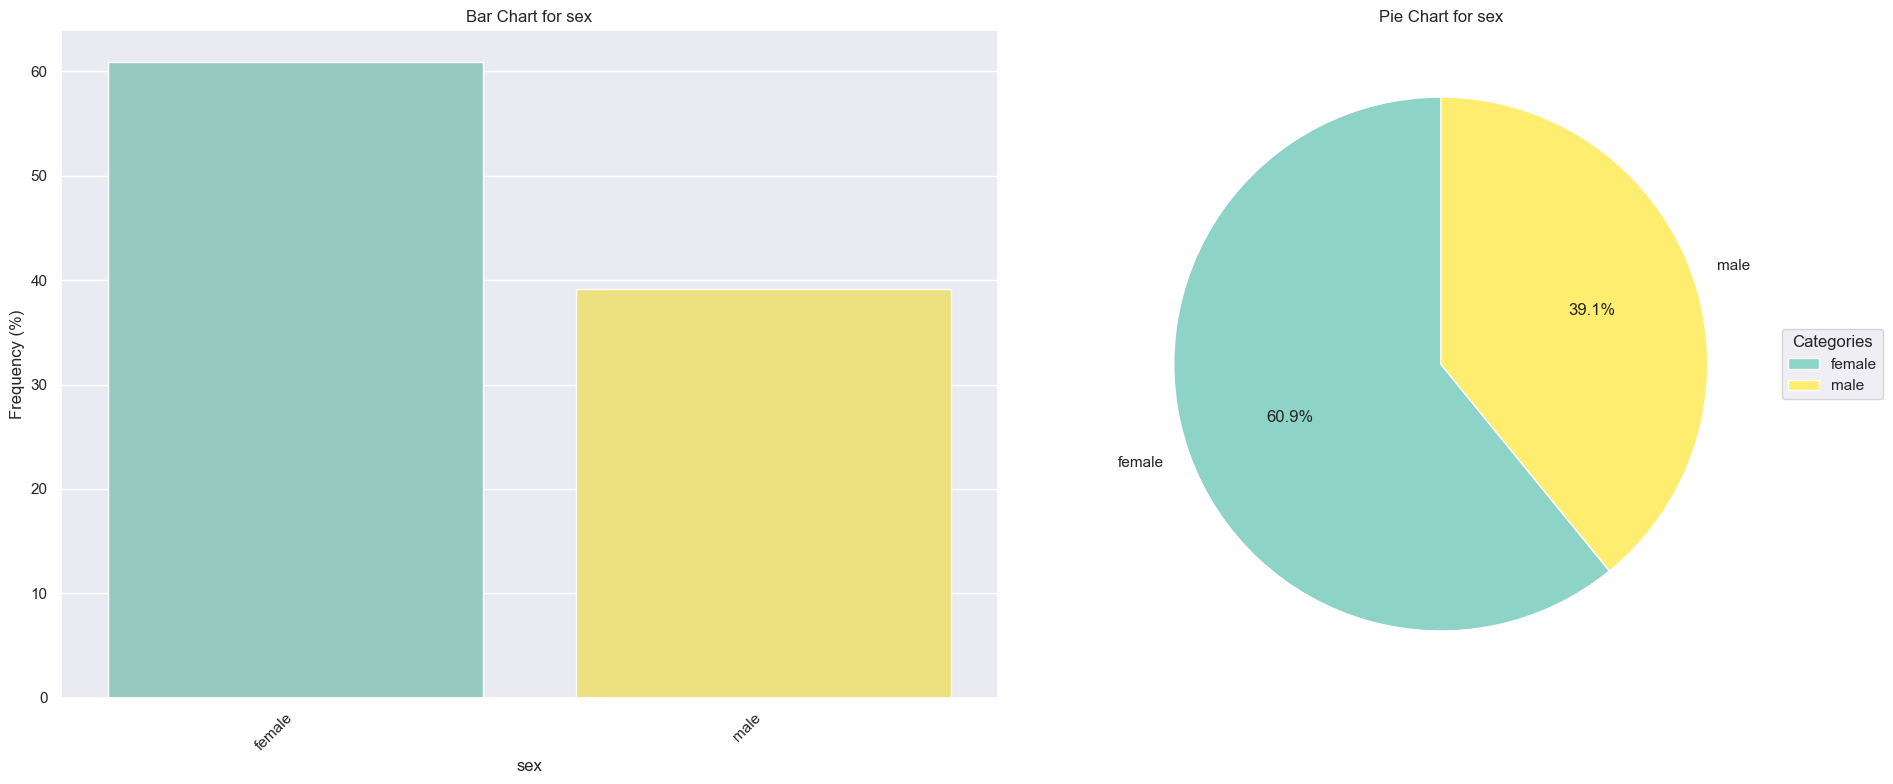

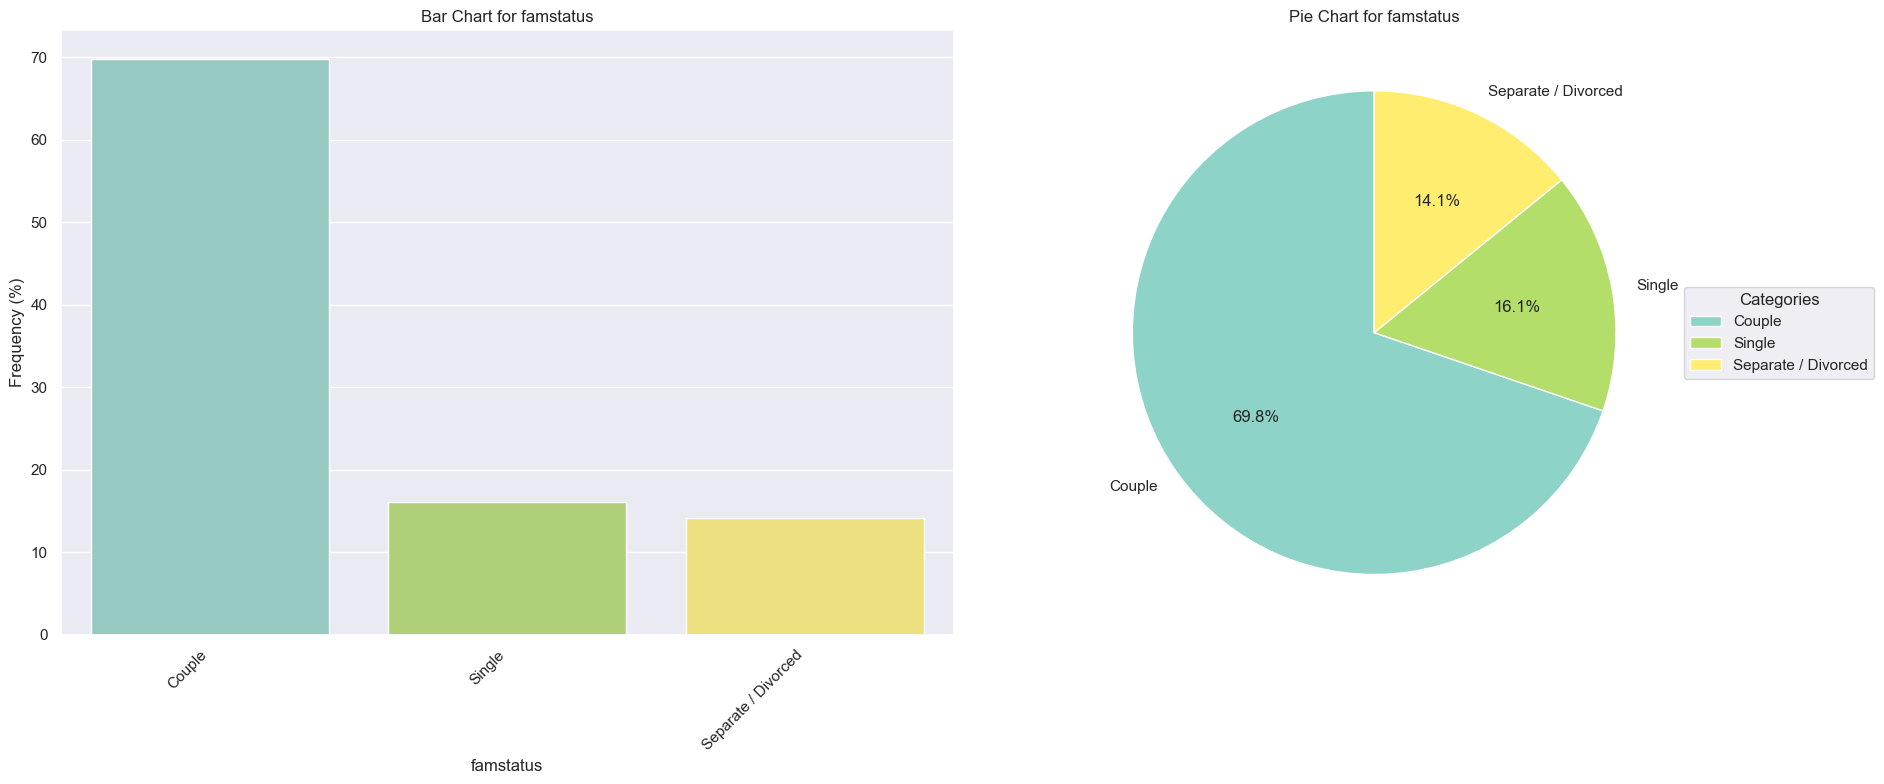

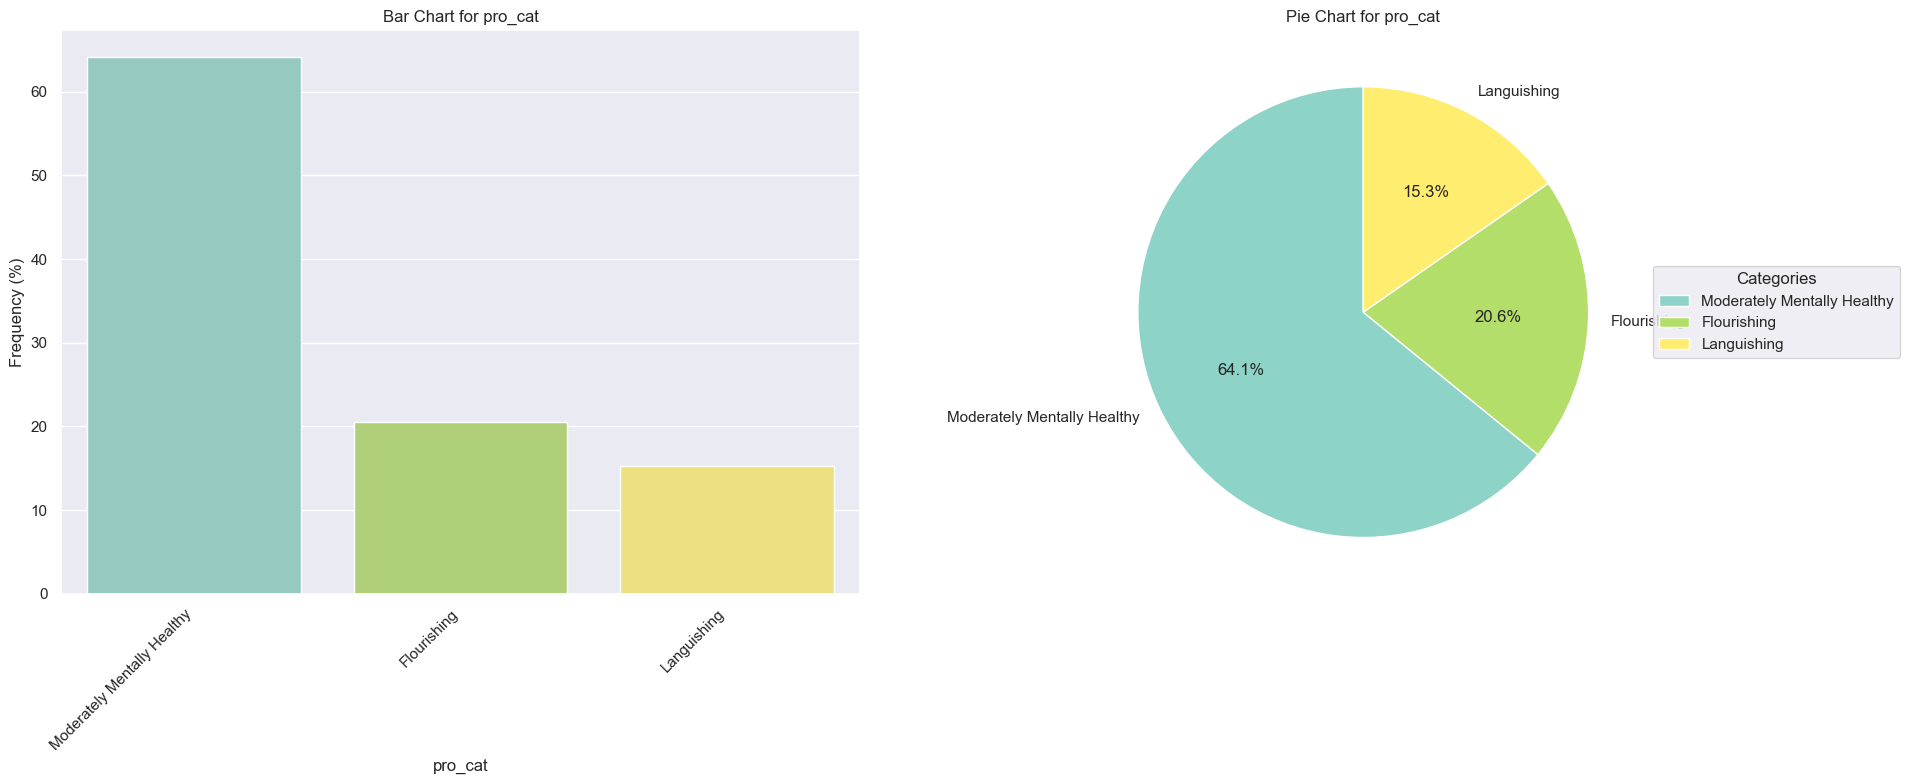

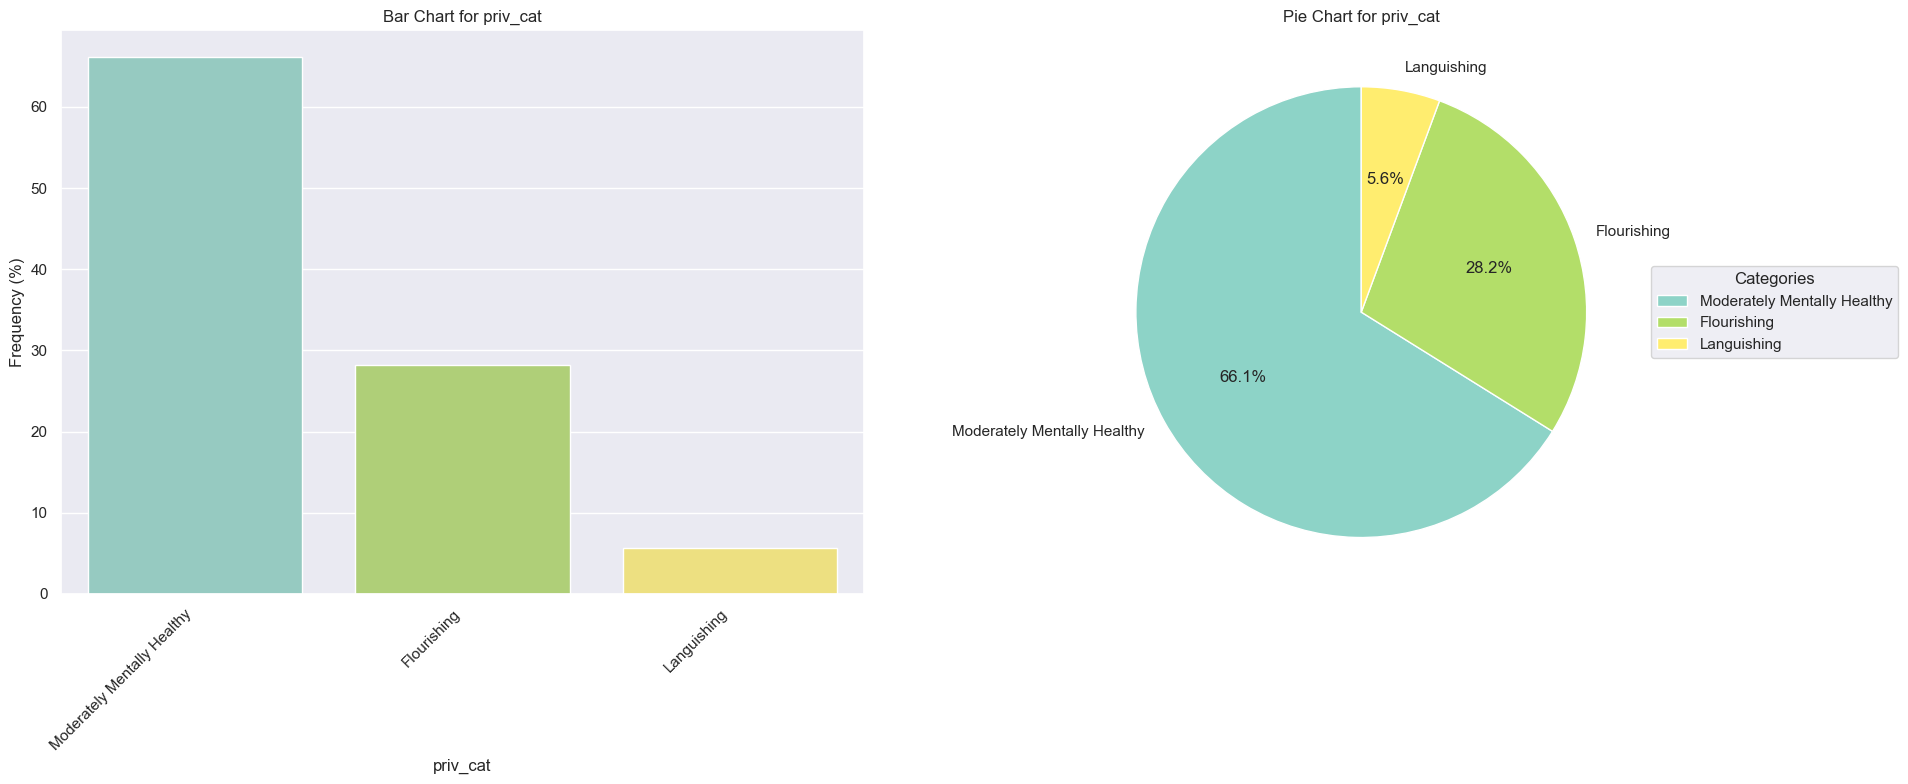

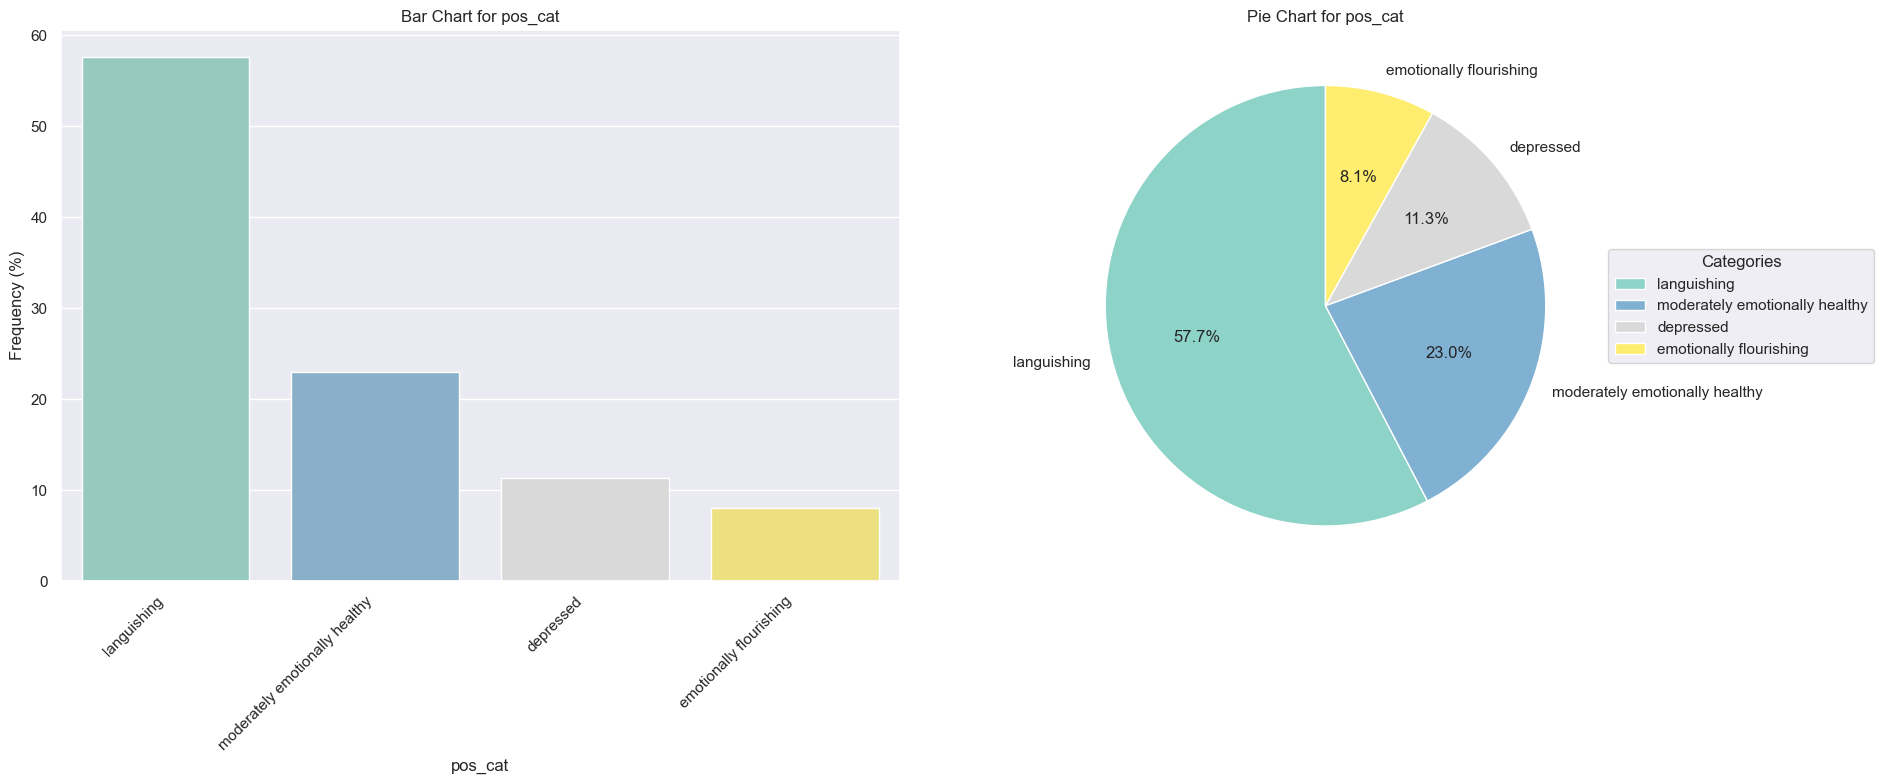

In [28]:
for i in categorical_cols:
    
    visualize_categorical_data(df,i)
    


### Continous

In [37]:
def plot_histogram_boxplot(data, column_name, bins=5):
    # Ensure data is a pandas Series
    if isinstance(data, pd.DataFrame):
        data = data[column_name]
    elif not isinstance(data, pd.Series):
        data = pd.Series(data)
    
    # Set up the plot
    # sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    
    # Histogram
    sns.histplot(data=data, bins=bins, ax=ax1)
    
    # Formatting for histogram
    ax1.set_xlabel(column_name)
    ax1.set_ylabel("Count")
    ax1.set_title(f"Histogram for {column_name}")
    
    # Vertical Boxplot
    sns.boxplot(y=data, ax=ax2, orient="v")
    ax2.set_title(f"Box plot for {column_name}")
    ax2.set_ylabel(column_name)
    
    plt.tight_layout()
    plt.show()

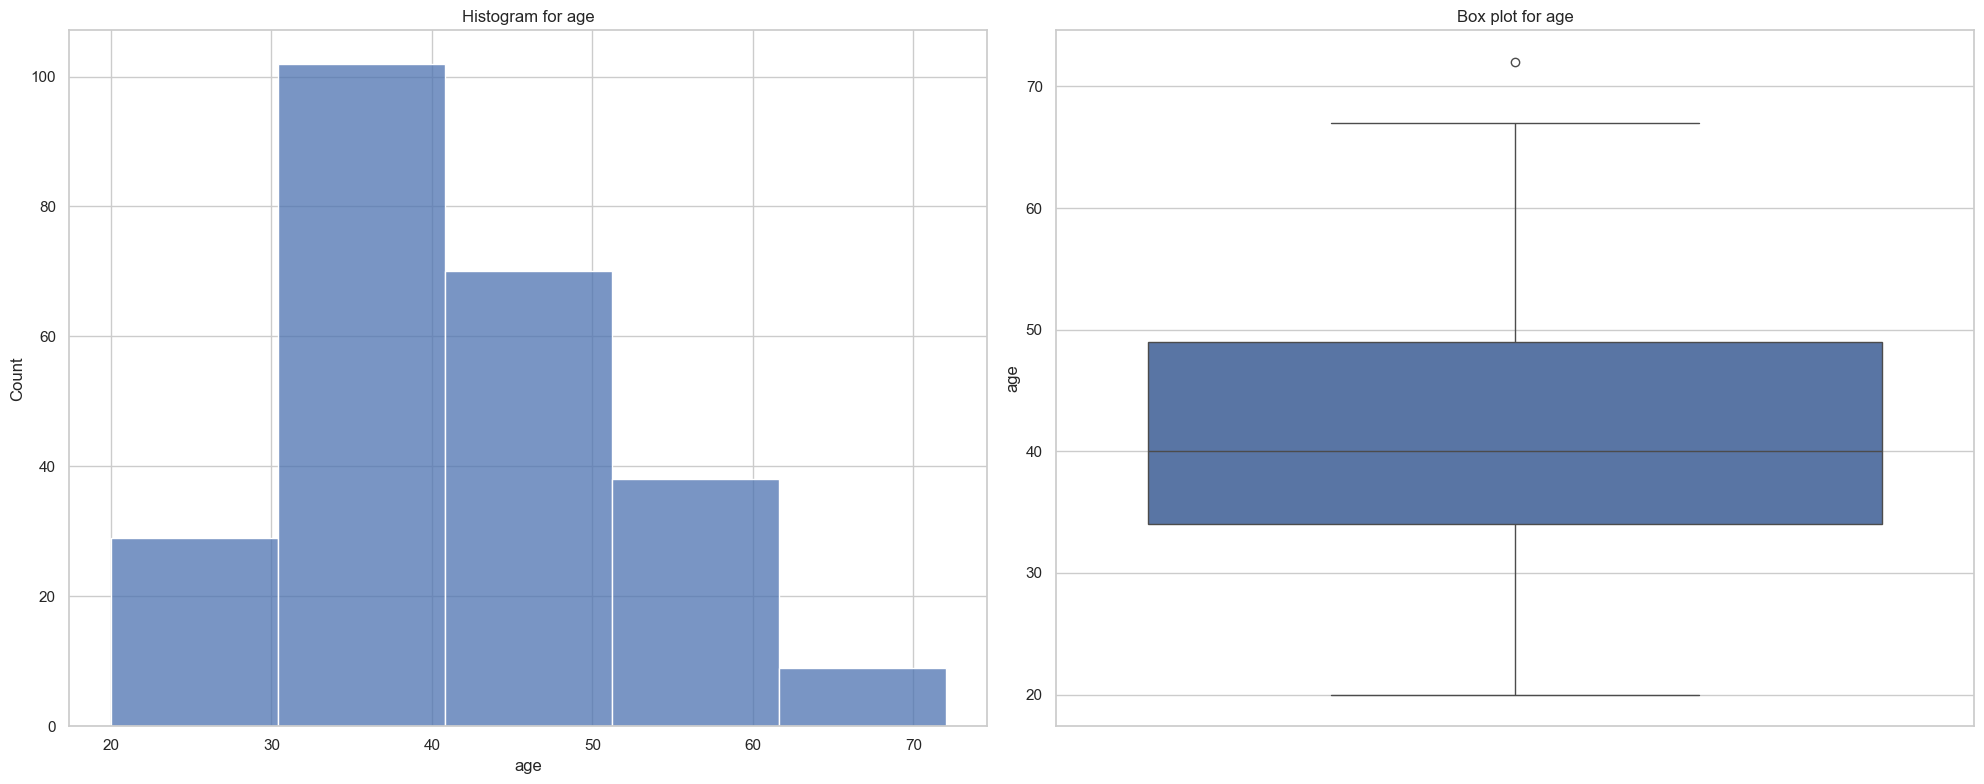

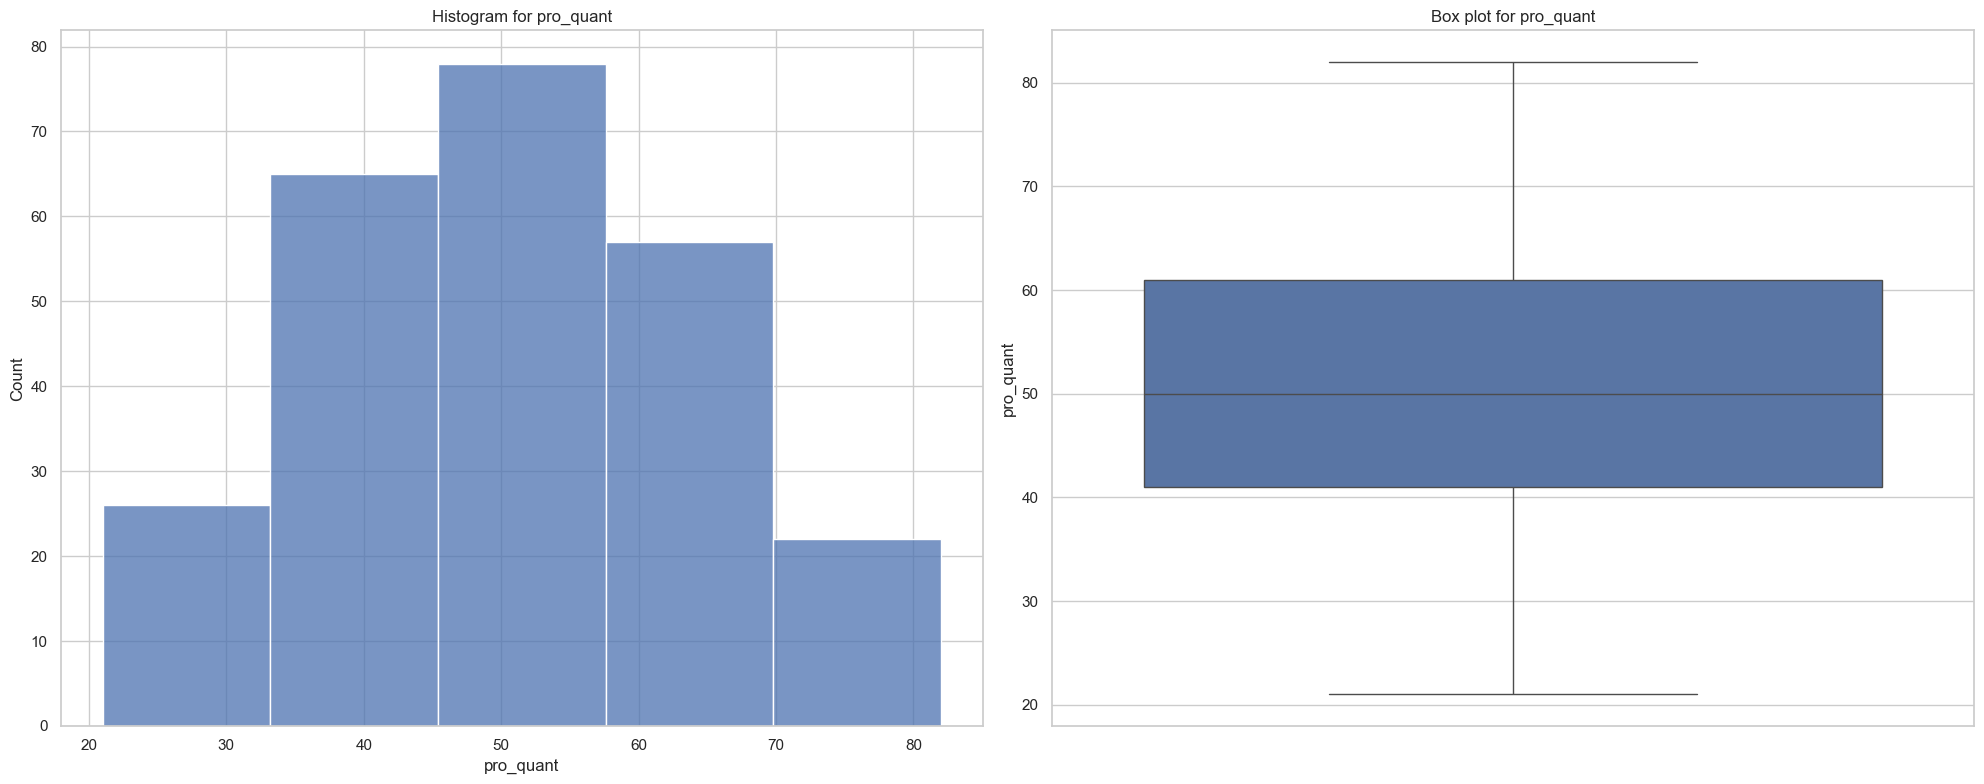

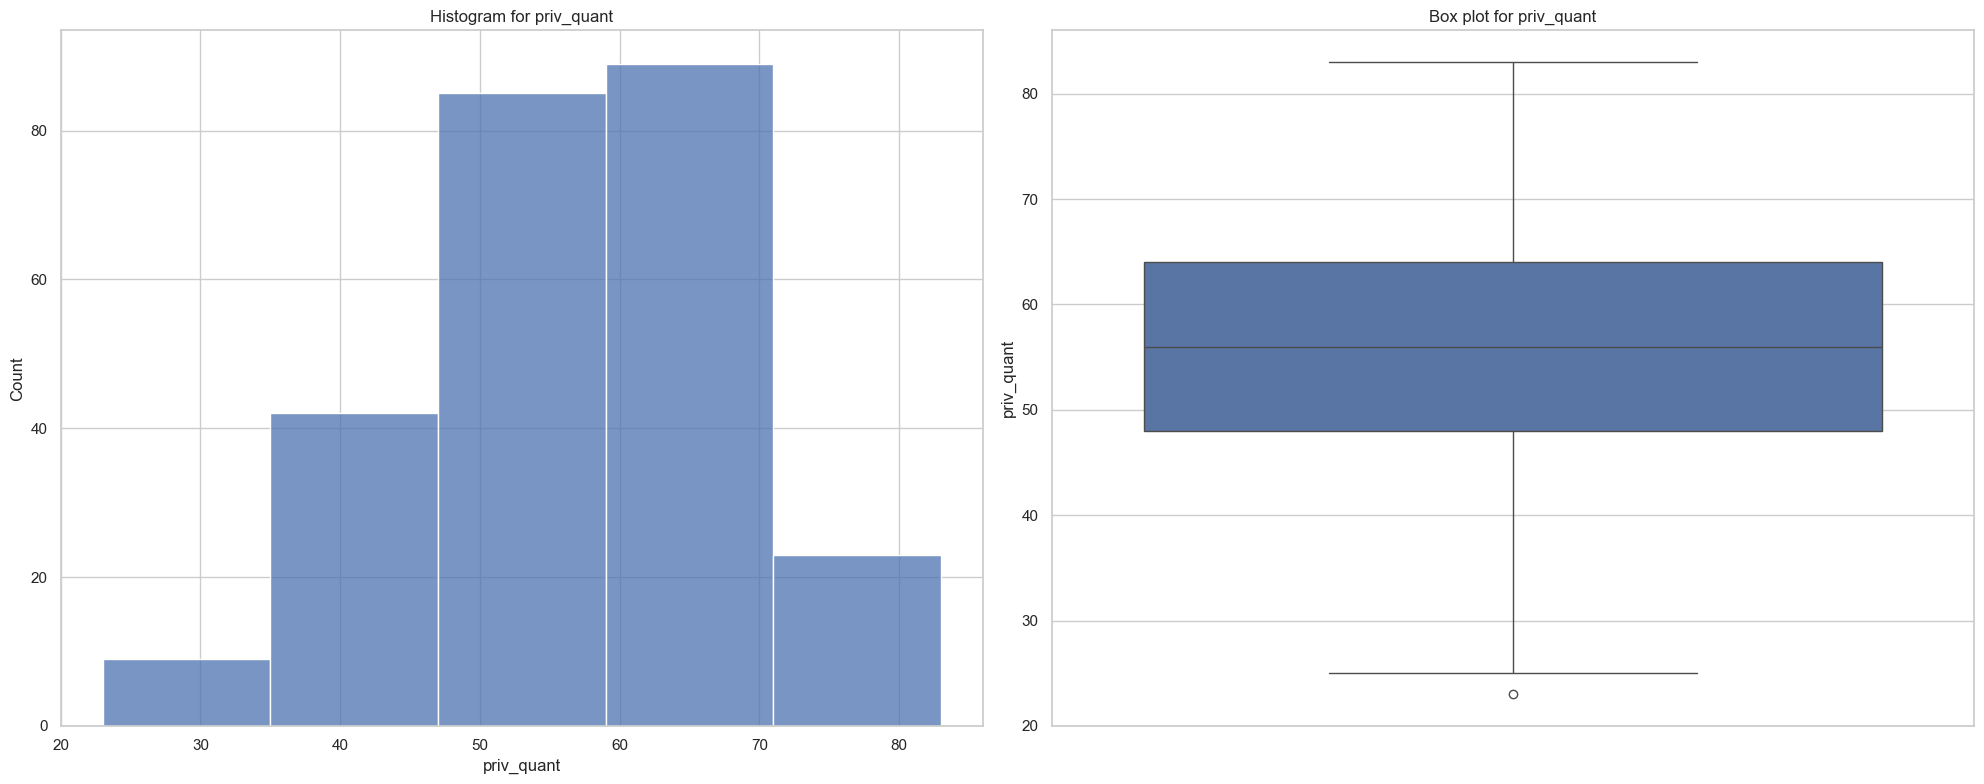

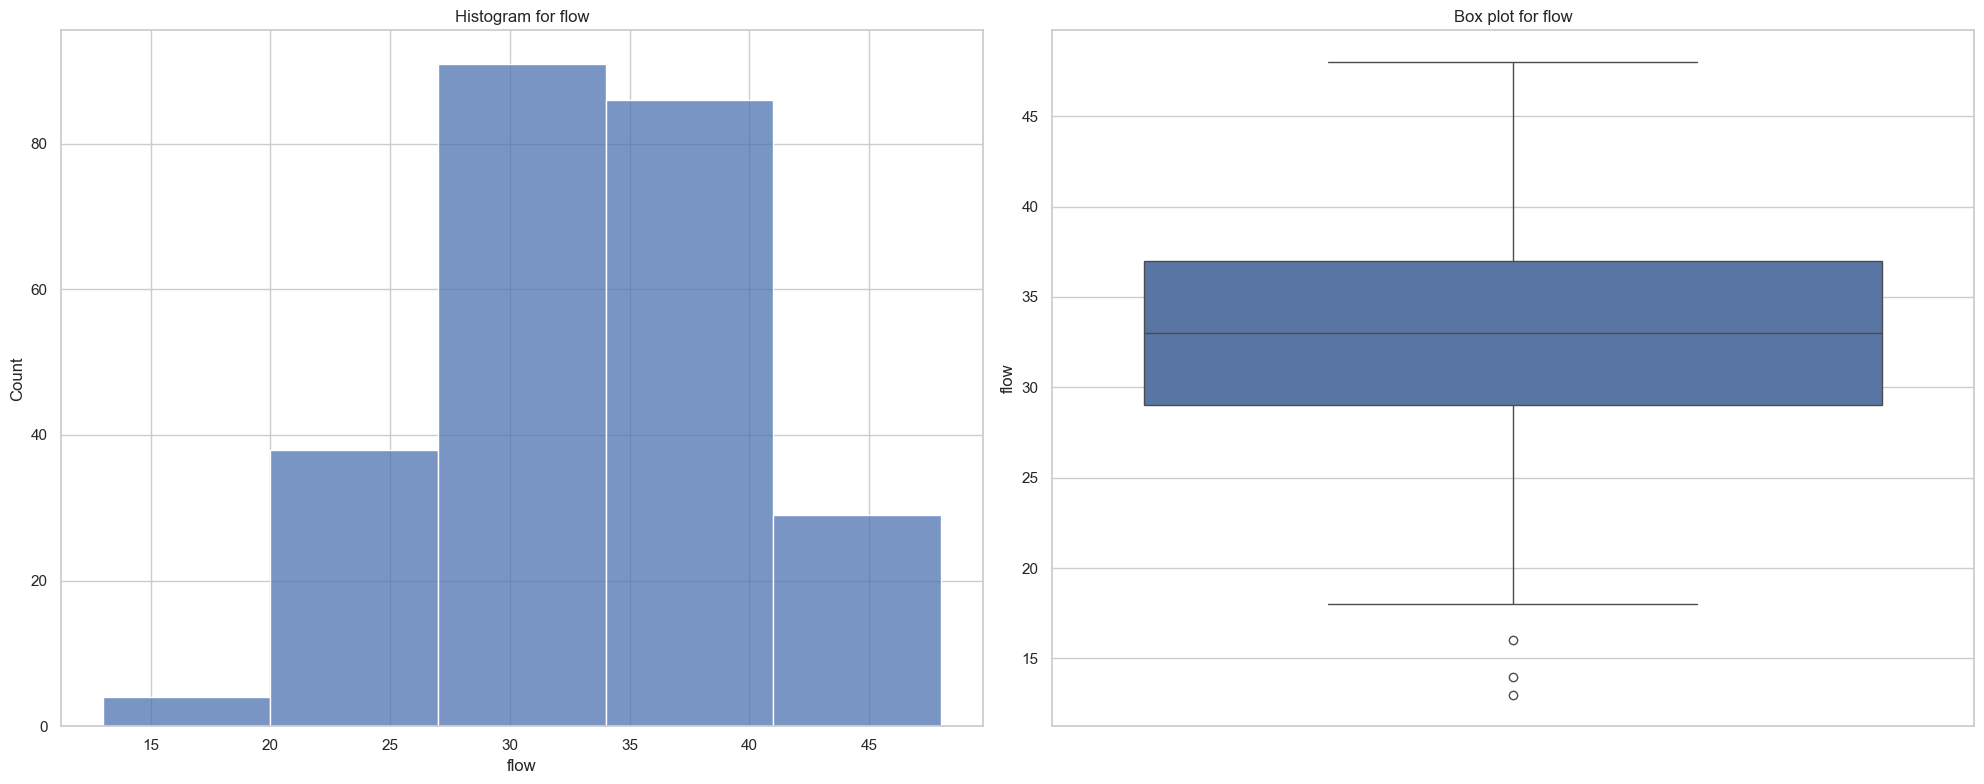

In [38]:
for i in numerical_cols:
    
    plot_histogram_boxplot(df, i)

## Bivariate

### Categorical

In [12]:
categorical_cols

['education', 'sex', 'famstatus', 'pro_cat', 'priv_cat', 'pos_cat']

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

siginicant_list = []
non_significant_list = []
def bivariate_Categorical(x,y,a,b):
    contingency_table = pd.crosstab(df[x], df[y])
    print("Contingency Table:")
    print(contingency_table)
    

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    
   
    alpha = 0.05  # Common significance level
    
    if p_value <= alpha:
        print(f"\nThe p-value ({p_value:.4f}) is less than or equal to the significance level ({alpha}).")
        print("We reject the null hypothesis.")
        print(f"There is a significant relationship between {x} and {y}.")
        a.append((contingency_table,x,y,p_value))
    else:
        print(f"\nThe p-value ({p_value:.4f}) is greater than the significance level ({alpha}).")
        print("We fail to reject the null hypothesis.")
        print(f"There is not enough evidence to conclude a significant relationship between {x} and {y}.")
        b.append((contingency_table,x,y,p_value))
    
    # Optional: Calculate and display Cramer's V for effect size
    def cramers_v(contingency_table):
        chi2 = chi2_contingency(contingency_table)[0]
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        return np.sqrt(chi2 / (n * min_dim))
    
    cramer_v = cramers_v(contingency_table)
    print(f"\nCramer's V: {cramer_v:.4f}")



In [14]:
categorical_cols

['education', 'sex', 'famstatus', 'pro_cat', 'priv_cat', 'pos_cat']

In [15]:


for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):  # Corrected the range
        bivariate_Categorical(categorical_cols[i], categorical_cols[j], siginicant_list, non_significant_list)


Contingency Table:
sex               female  male
education                     
completed HS          12     8
not completed HS       5     4
upto 2Y after HS      23    16
upto 3Y after HS      22     9
upto 4Y after HS      22    17
upto 5Y after HS      67    43

Chi-square statistic: 1.8250
p-value: 0.8728
Degrees of freedom: 5

The p-value (0.8728) is greater than the significance level (0.05).
We fail to reject the null hypothesis.
There is not enough evidence to conclude a significant relationship between education and sex.

Cramer's V: 0.0858
Contingency Table:
famstatus         Couple  Separate / Divorced  Single
education                                            
completed HS          10                    4       6
not completed HS       7                    1       1
upto 2Y after HS      27                    7       5
upto 3Y after HS      18                    7       6
upto 4Y after HS      27                    6       6
upto 5Y after HS      84                   10

In [16]:
for i in siginicant_list:
    print(f"the variables {i[1]} and {i[2]} have significant relationship between them because they have pvalue {i[3]:.4f}")

the variables education and pos_cat have significant relationship between them because they have pvalue 0.0298
the variables sex and famstatus have significant relationship between them because they have pvalue 0.0161
the variables famstatus and priv_cat have significant relationship between them because they have pvalue 0.0251
the variables pro_cat and priv_cat have significant relationship between them because they have pvalue 0.0000
the variables pro_cat and pos_cat have significant relationship between them because they have pvalue 0.0000
the variables priv_cat and pos_cat have significant relationship between them because they have pvalue 0.0000


In [17]:
for i in non_significant_list:
    print(f"the variables {i[1]} and {i[2]} have no significant relationship between them  because they have pvalue {i[3]:.4f}")

the variables education and sex have no significant relationship between them  because they have pvalue 0.8728
the variables education and famstatus have no significant relationship between them  because they have pvalue 0.4217
the variables education and pro_cat have no significant relationship between them  because they have pvalue 0.2886
the variables education and priv_cat have no significant relationship between them  because they have pvalue 0.3594
the variables sex and pro_cat have no significant relationship between them  because they have pvalue 0.7920
the variables sex and priv_cat have no significant relationship between them  because they have pvalue 0.5747
the variables sex and pos_cat have no significant relationship between them  because they have pvalue 0.1790
the variables famstatus and pro_cat have no significant relationship between them  because they have pvalue 0.5592
the variables famstatus and pos_cat have no significant relationship between them  because they ha

In [18]:
siginicant_list[0][0]

pos_cat,depressed,emotionally flourishing,languishing,moderately emotionally healthy
education,,,,
completed HS,2,1,8,9
not completed HS,1,1,4,3
upto 2Y after HS,4,1,24,10
upto 3Y after HS,1,2,14,14
upto 4Y after HS,3,5,24,7
upto 5Y after HS,17,10,69,14


In [19]:
dfs=siginicant_list[0][0].reset_index()
dfs

pos_cat,education,depressed,emotionally flourishing,languishing,moderately emotionally healthy
0,completed HS,2,1,8,9
1,not completed HS,1,1,4,3
2,upto 2Y after HS,4,1,24,10
3,upto 3Y after HS,1,2,14,14
4,upto 4Y after HS,3,5,24,7
5,upto 5Y after HS,17,10,69,14


In [20]:
for i,value in enumerate(siginicant_list):
    print(i,value[1])

0 education
1 sex
2 famstatus
3 pro_cat
4 pro_cat
5 priv_cat


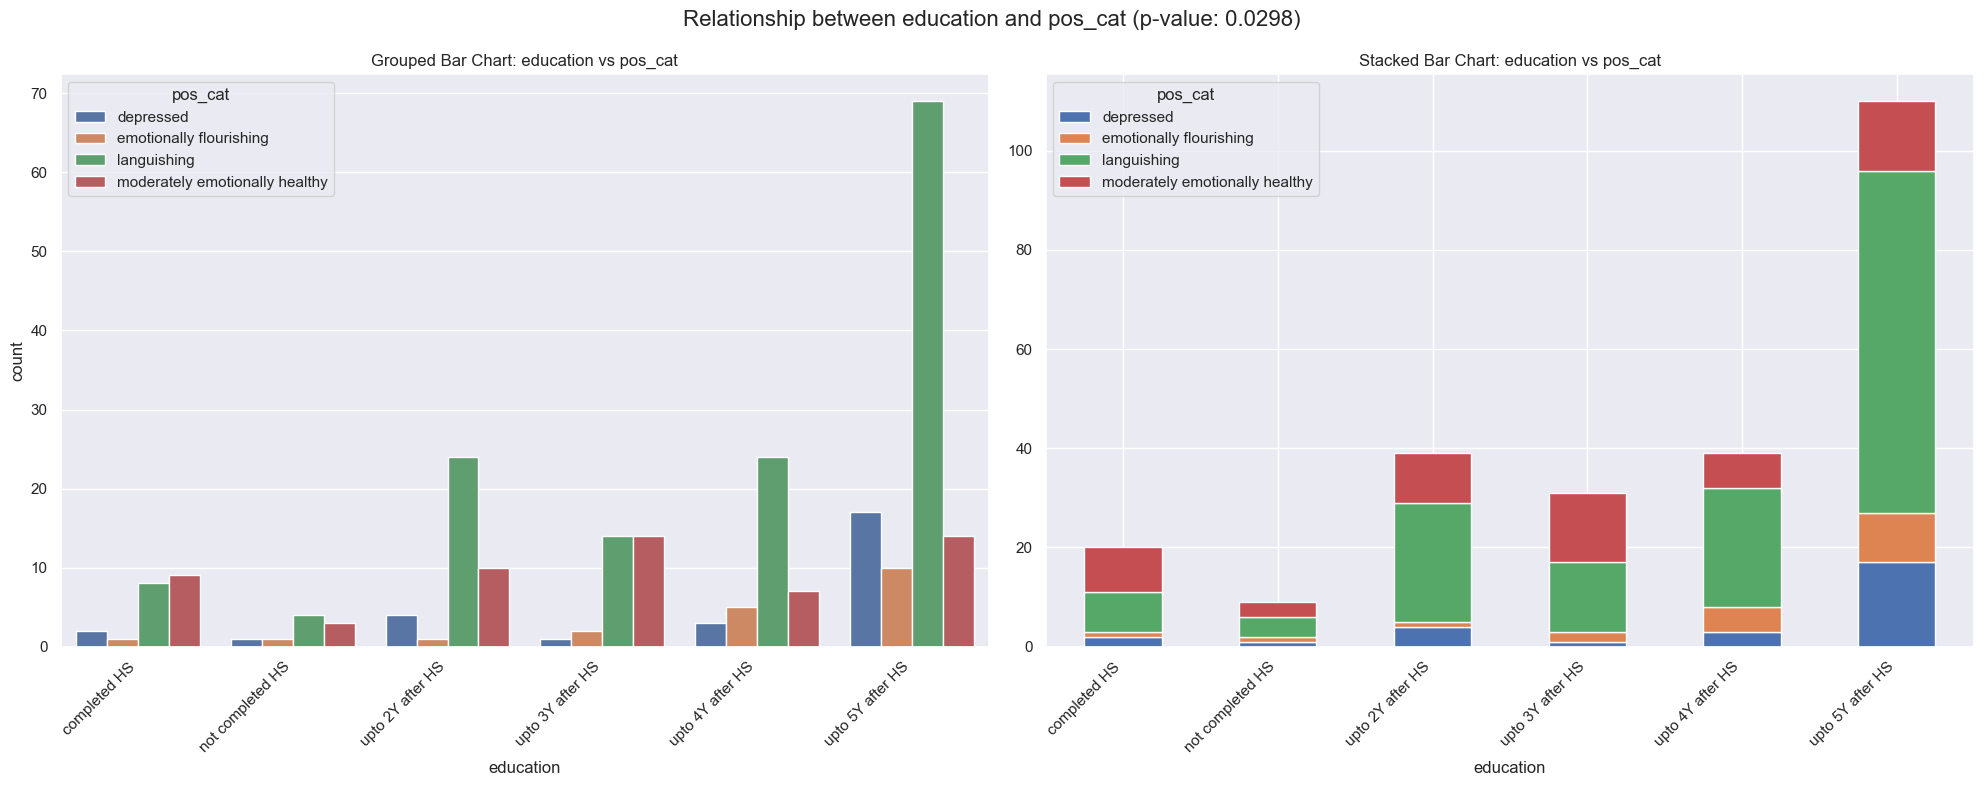

Completed plot 1 of 6


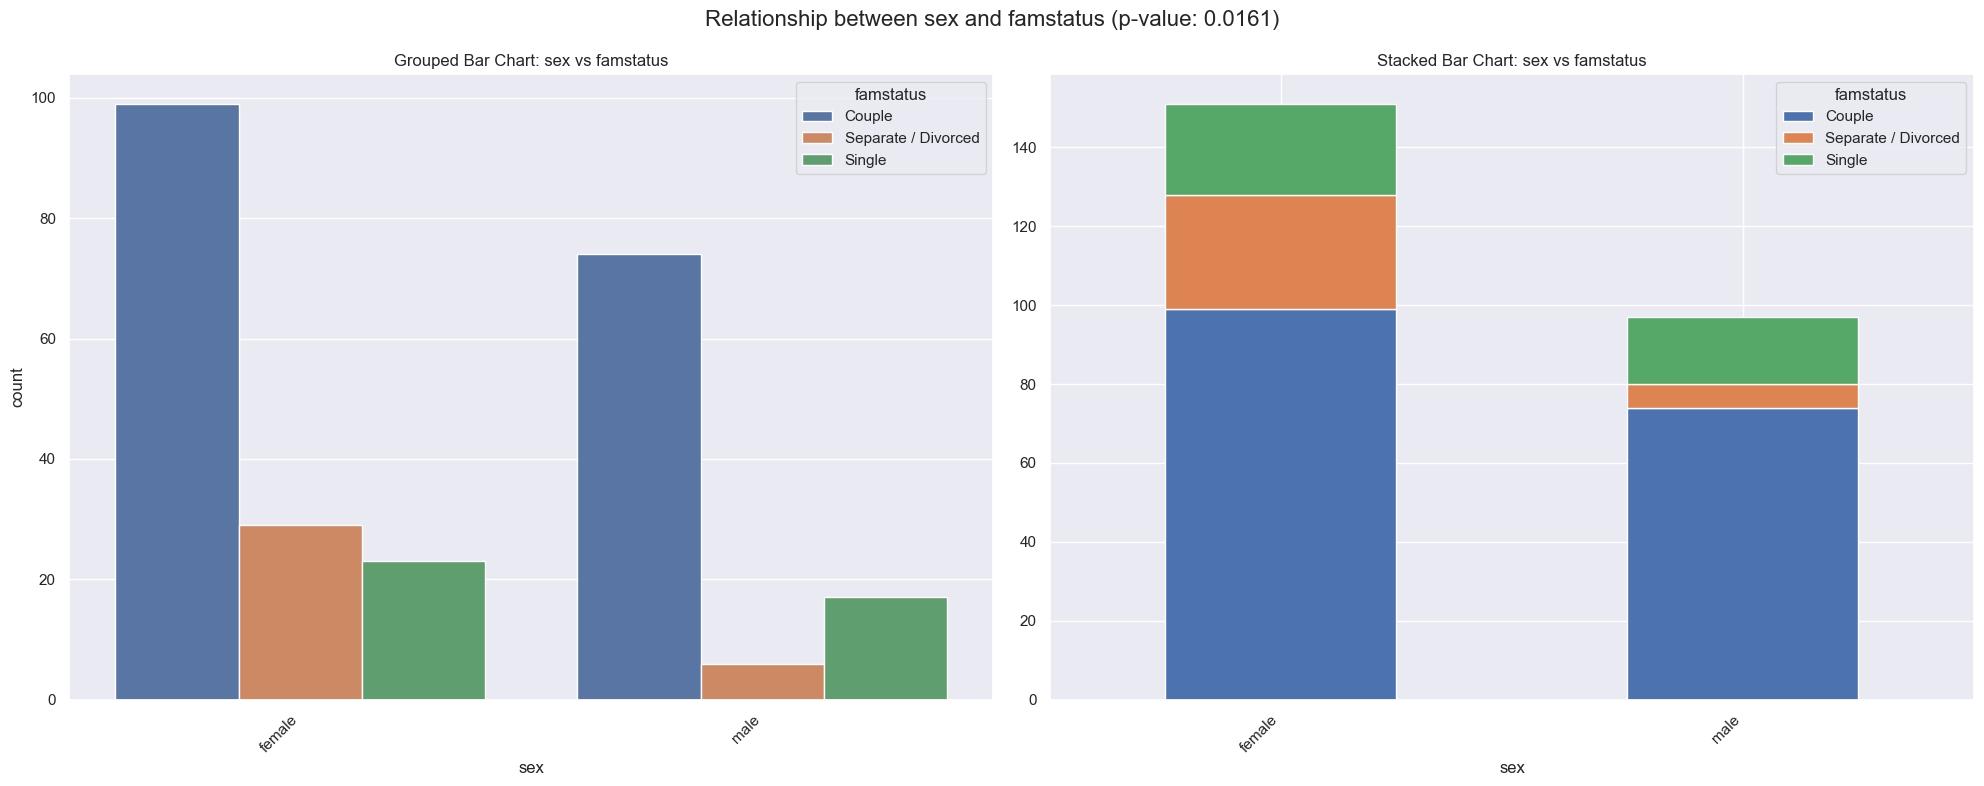

Completed plot 2 of 6


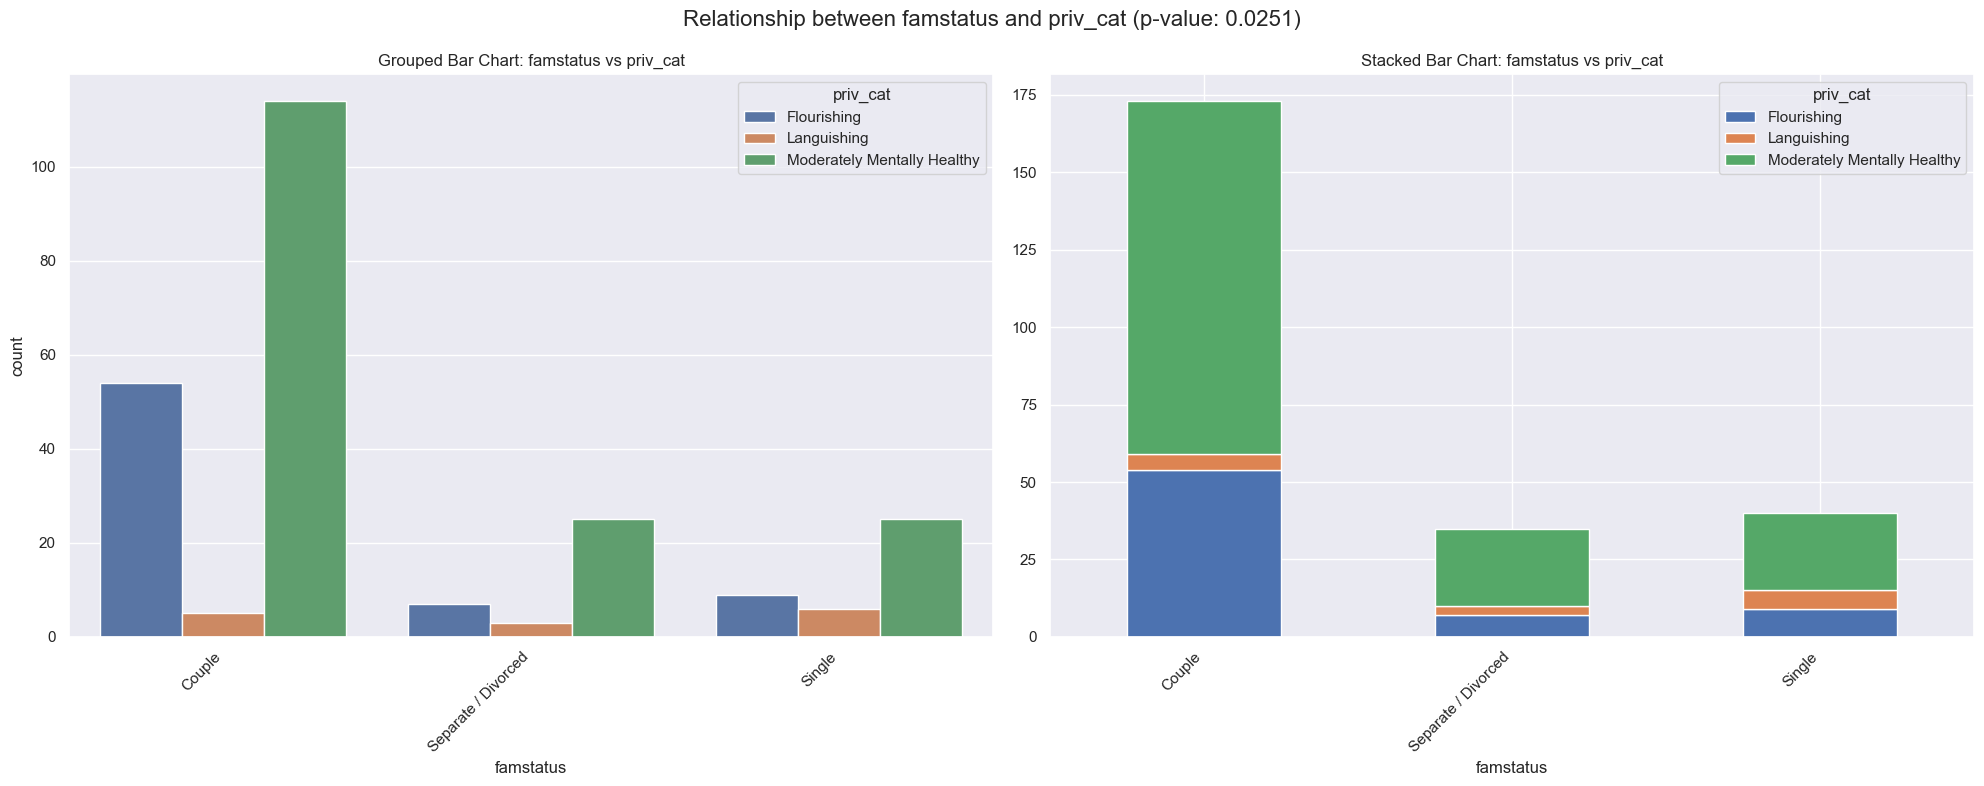

Completed plot 3 of 6


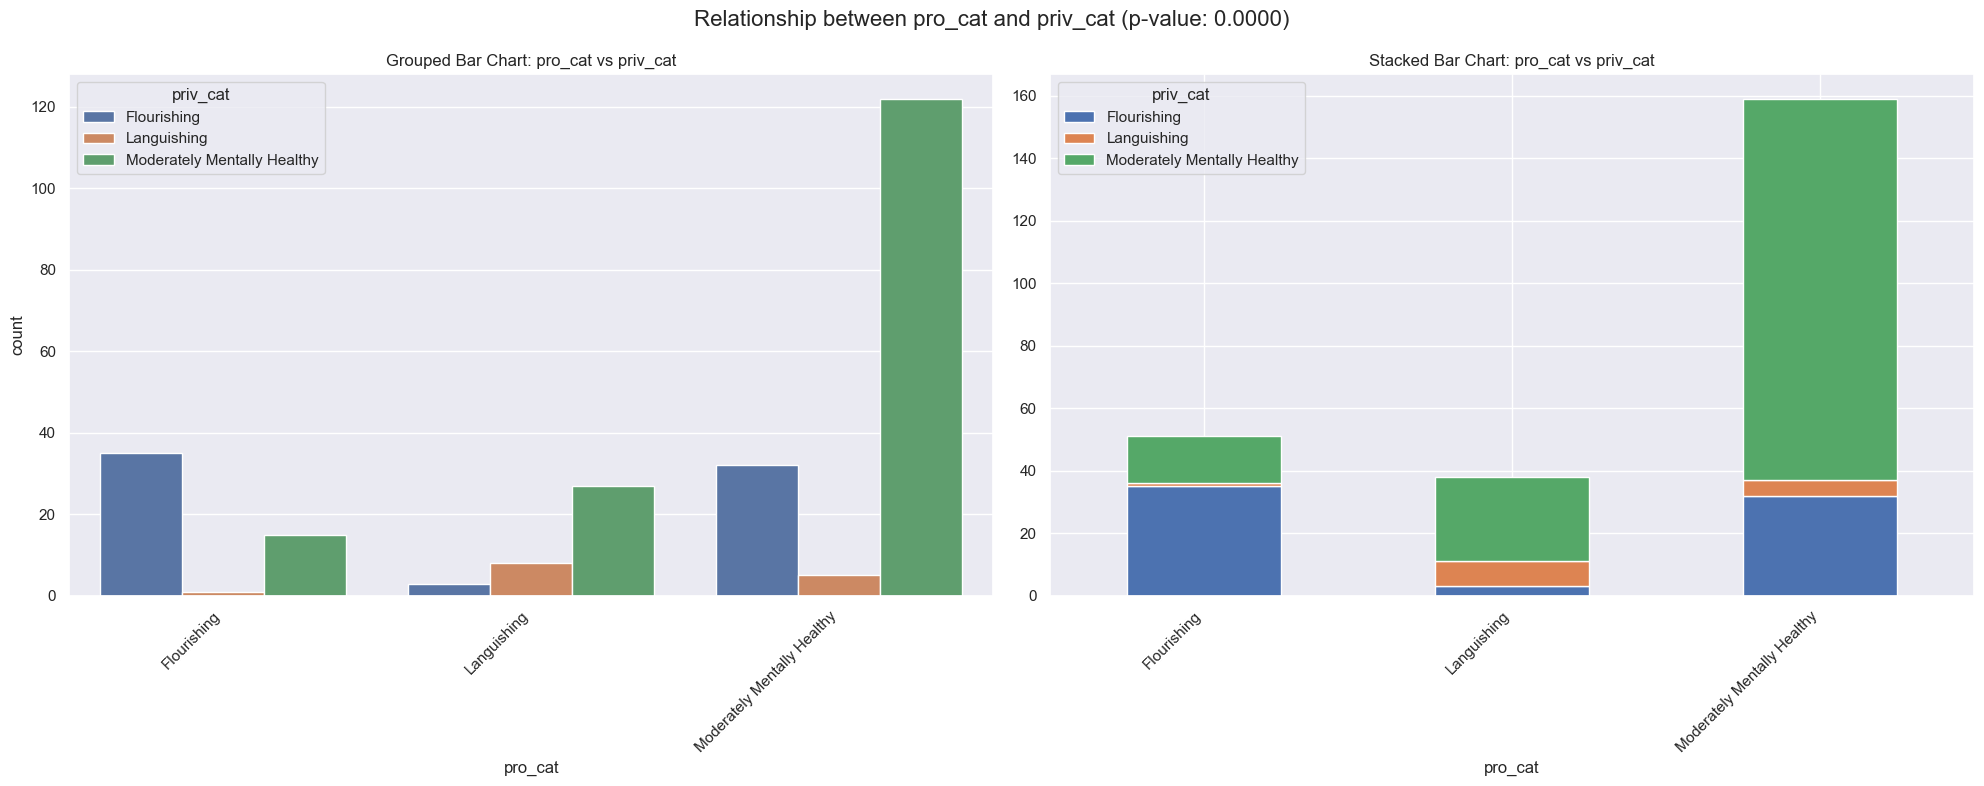

Completed plot 4 of 6


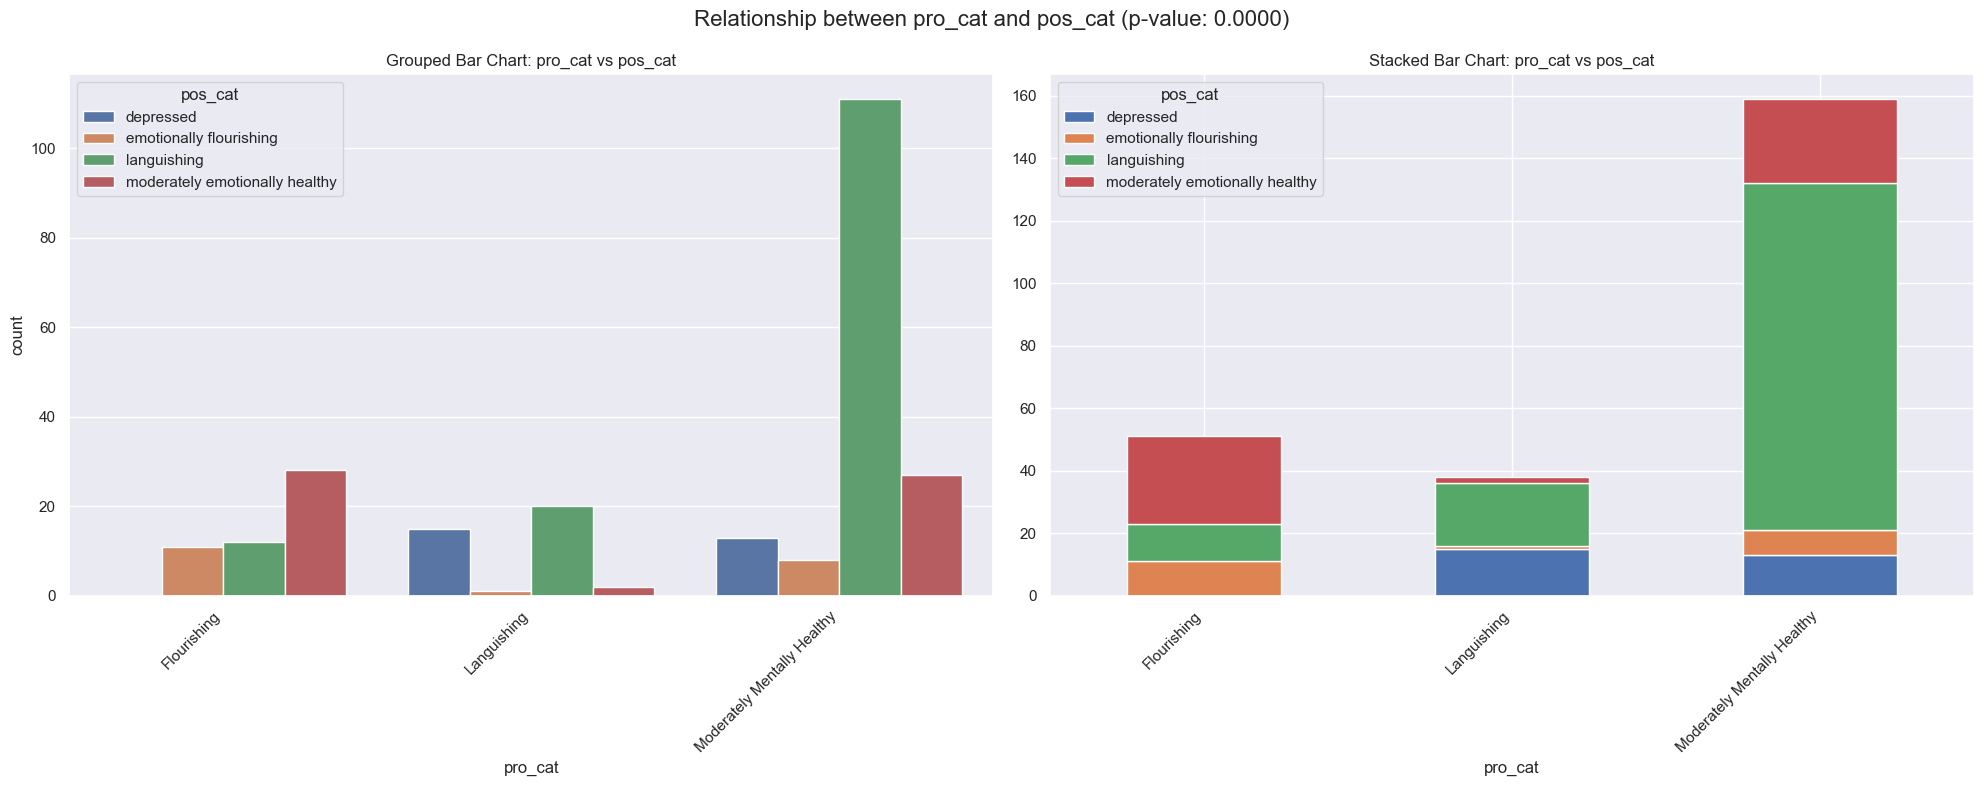

Completed plot 5 of 6


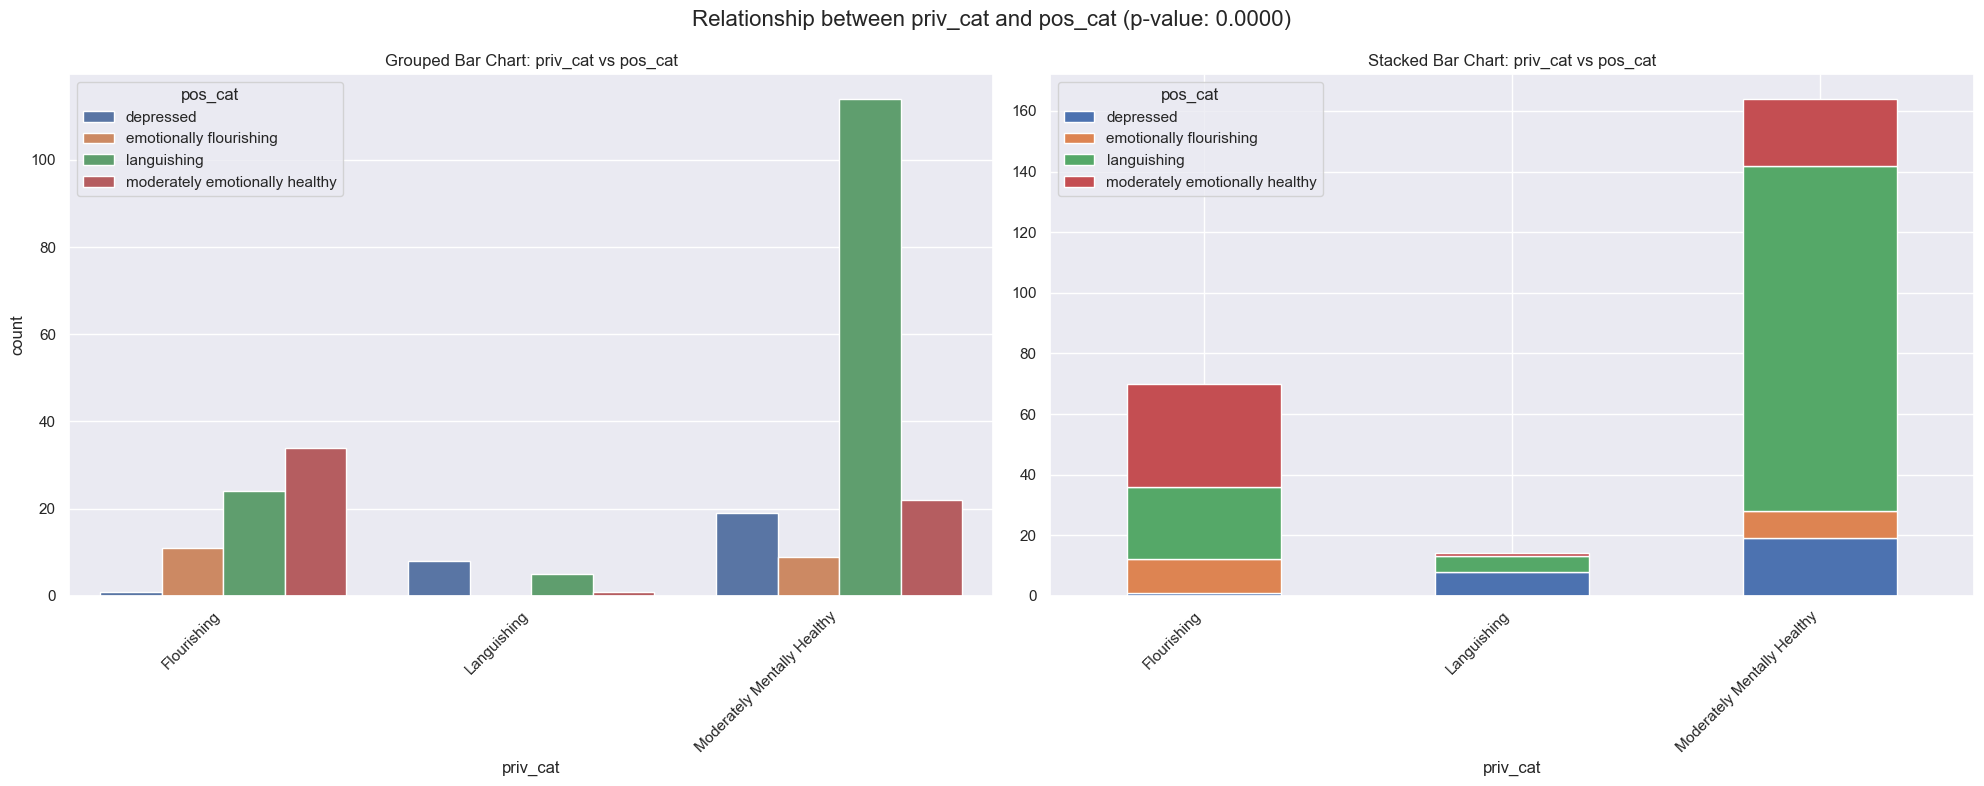

Completed plot 6 of 6


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i, item in enumerate(siginicant_list):
    contingency_df, var1, var2, pvalue = item
    
    # Reset index to make sure we have a proper DataFrame
    contingency_df = contingency_df.reset_index()
    
    # Melt the DataFrame to long format
    melted_df = pd.melt(contingency_df, id_vars=var1, var_name=var2, value_name='count')
    
    # Ensure the 'count' column is numeric
    melted_df['count'] = pd.to_numeric(melted_df['count'], errors='coerce')
    
    # Drop any rows with NaN values
    melted_df = melted_df.dropna()
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Grouped bar chart
    sns.barplot(x=var1, y='count', hue=var2, data=melted_df, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_title(f'Grouped Bar Chart: {var1} vs {var2}')
    
    # Stacked bar chart
    pivot_data = melted_df.pivot(index=var1, columns=var2, values='count')
    pivot_data.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title(f'Stacked Bar Chart: {var1} vs {var2}')
    
    # Add overall title with p-value
    plt.suptitle(f'Relationship between {var1} and {var2} (p-value: {pvalue:.4f})', fontsize=16)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust for the overall title
    plt.show()
    
    print(f"Completed plot {i+1} of {len(siginicant_list)}")

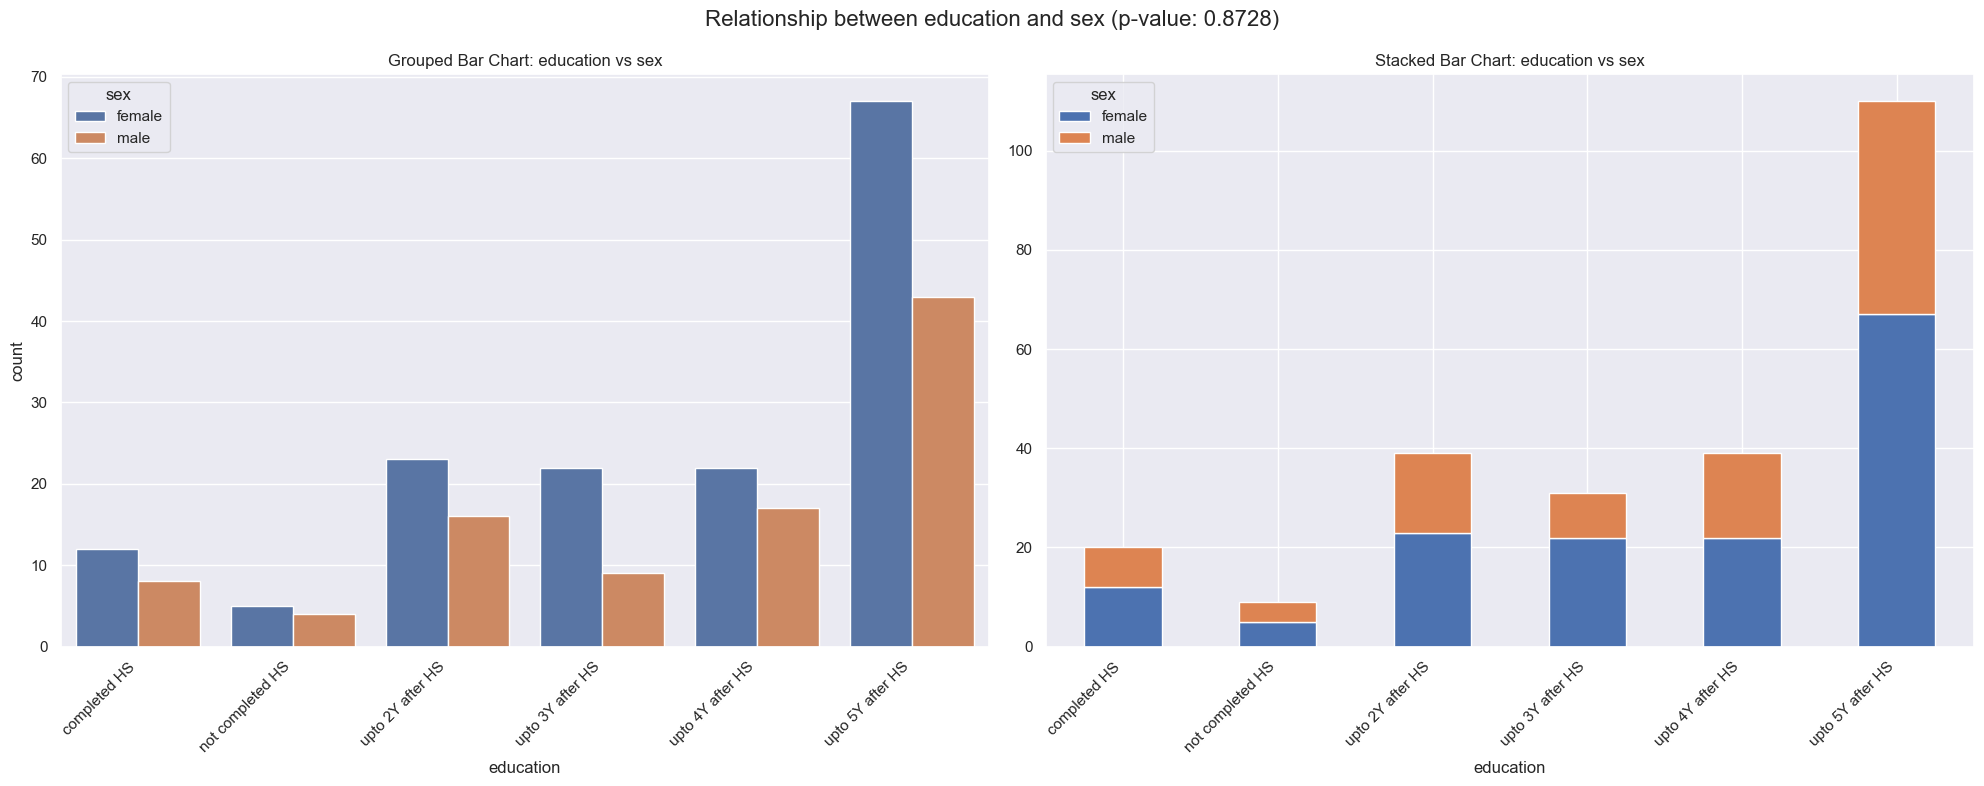

Completed plot 1 of 6


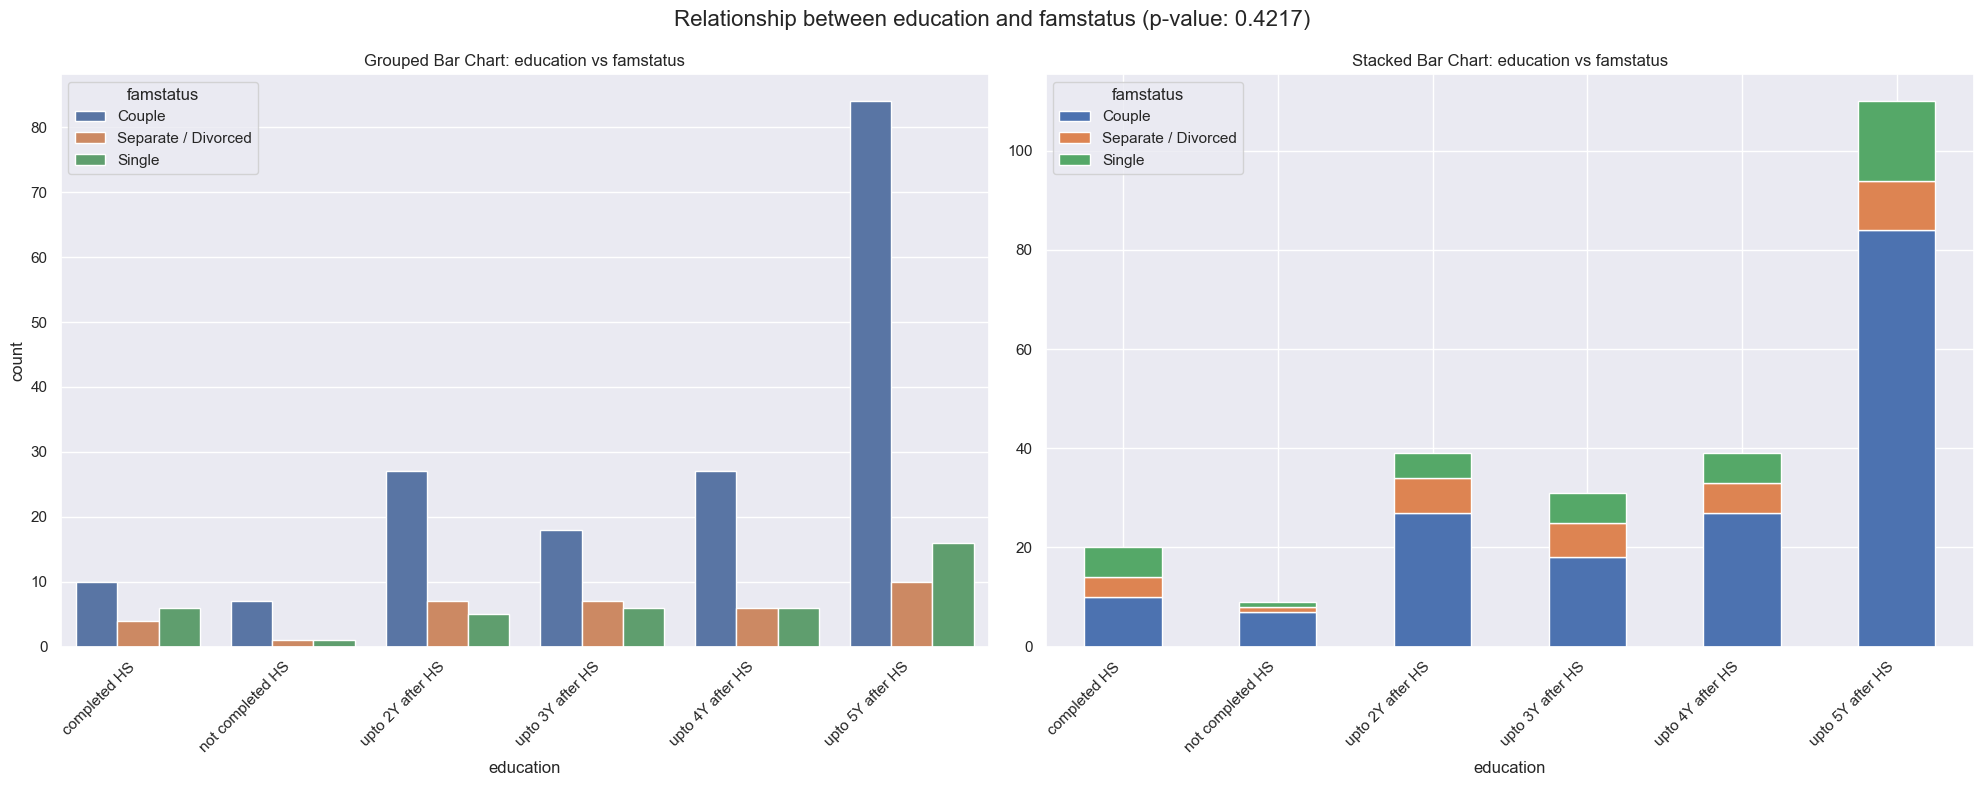

Completed plot 2 of 6


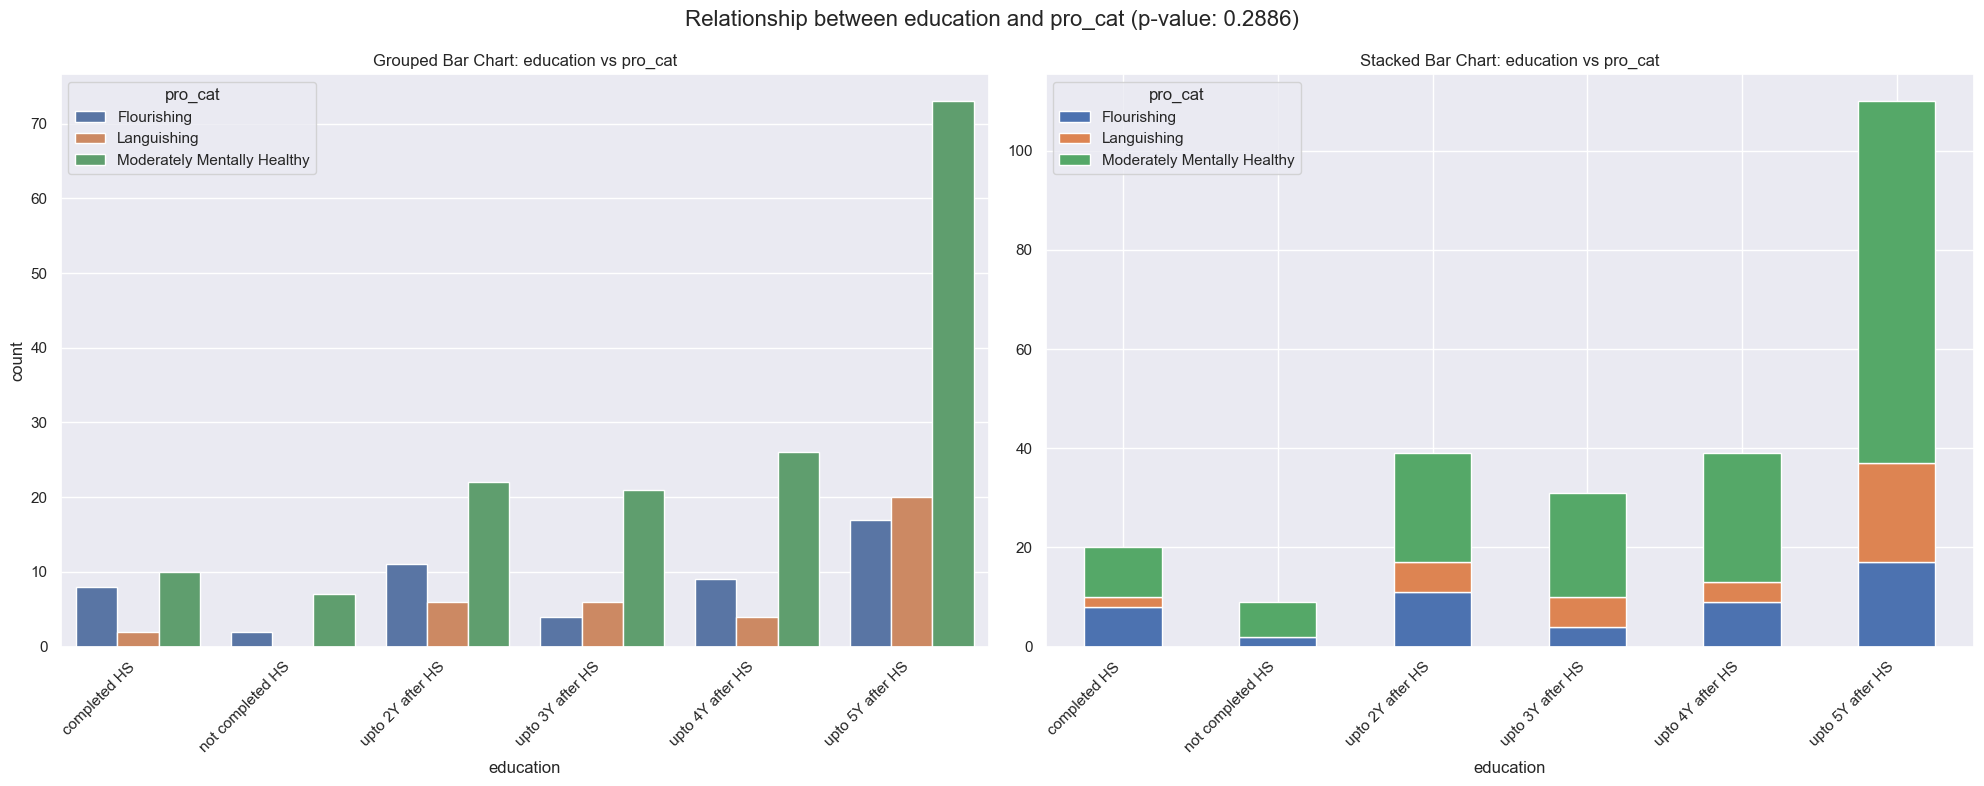

Completed plot 3 of 6


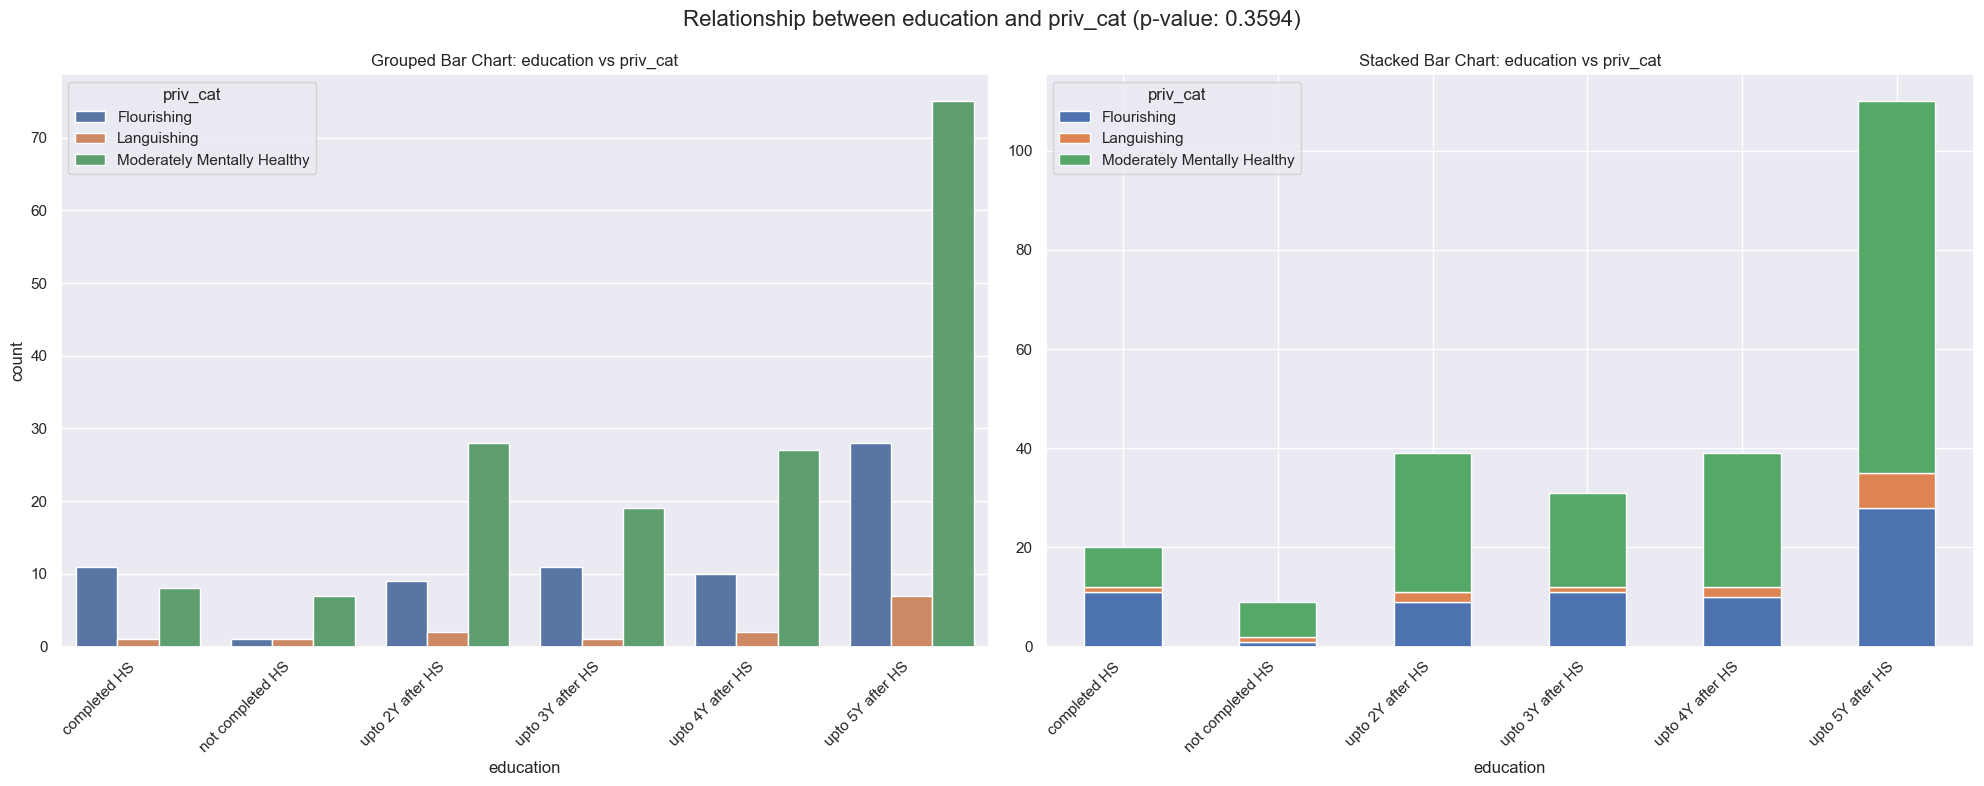

Completed plot 4 of 6


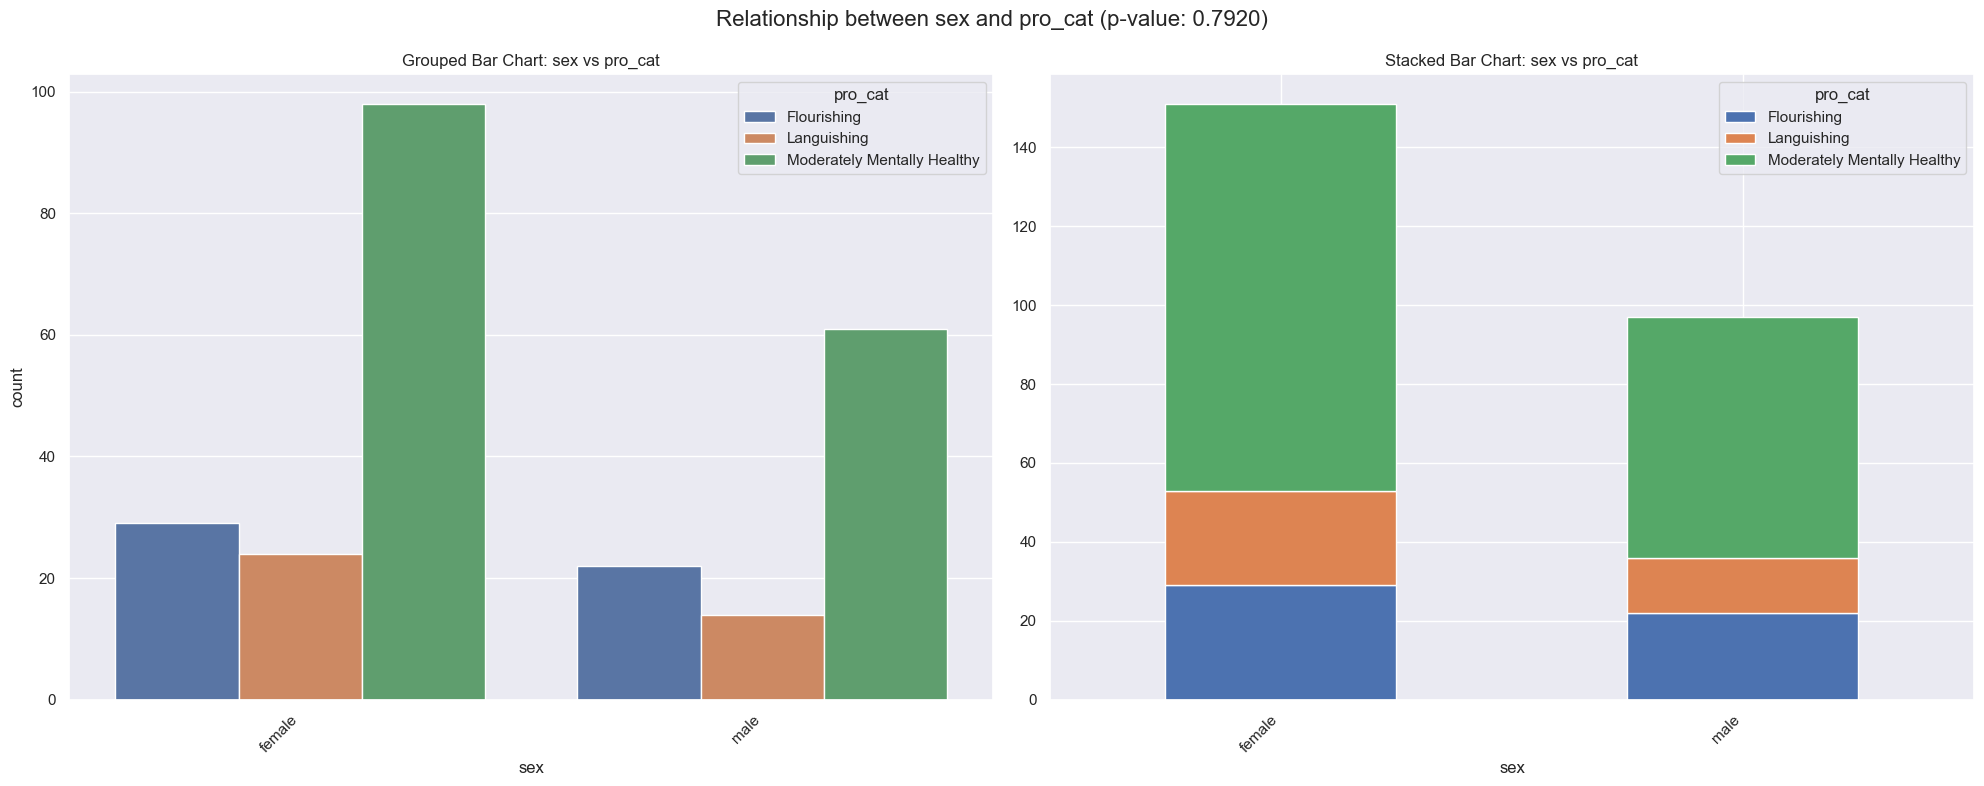

Completed plot 5 of 6


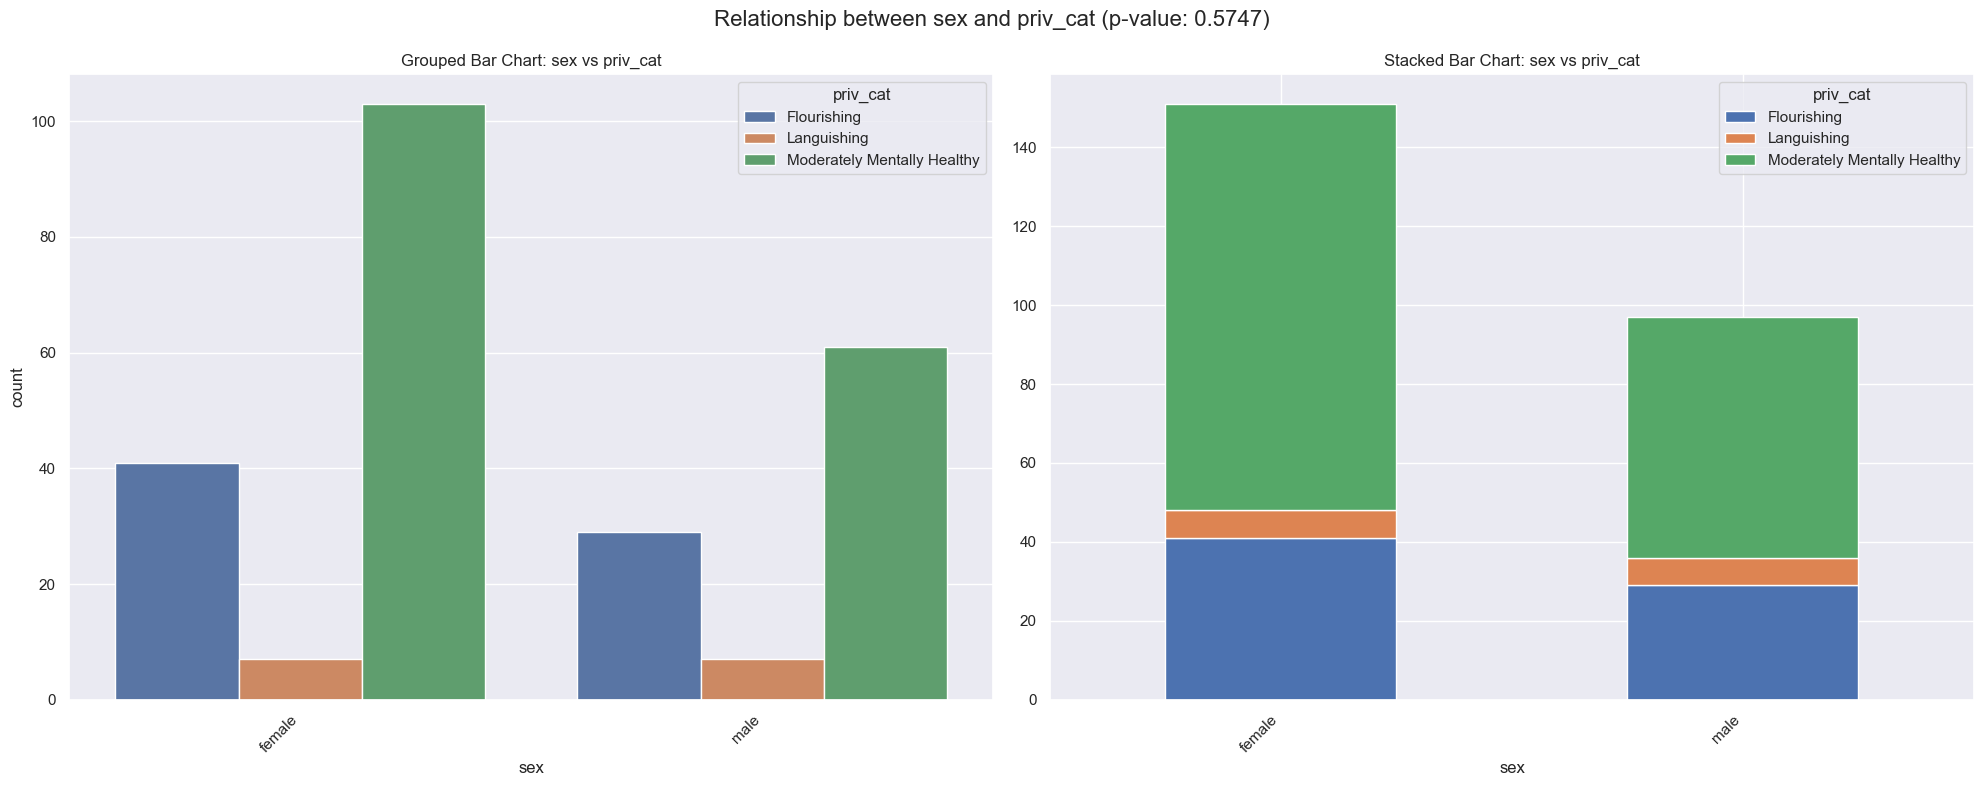

Completed plot 6 of 6


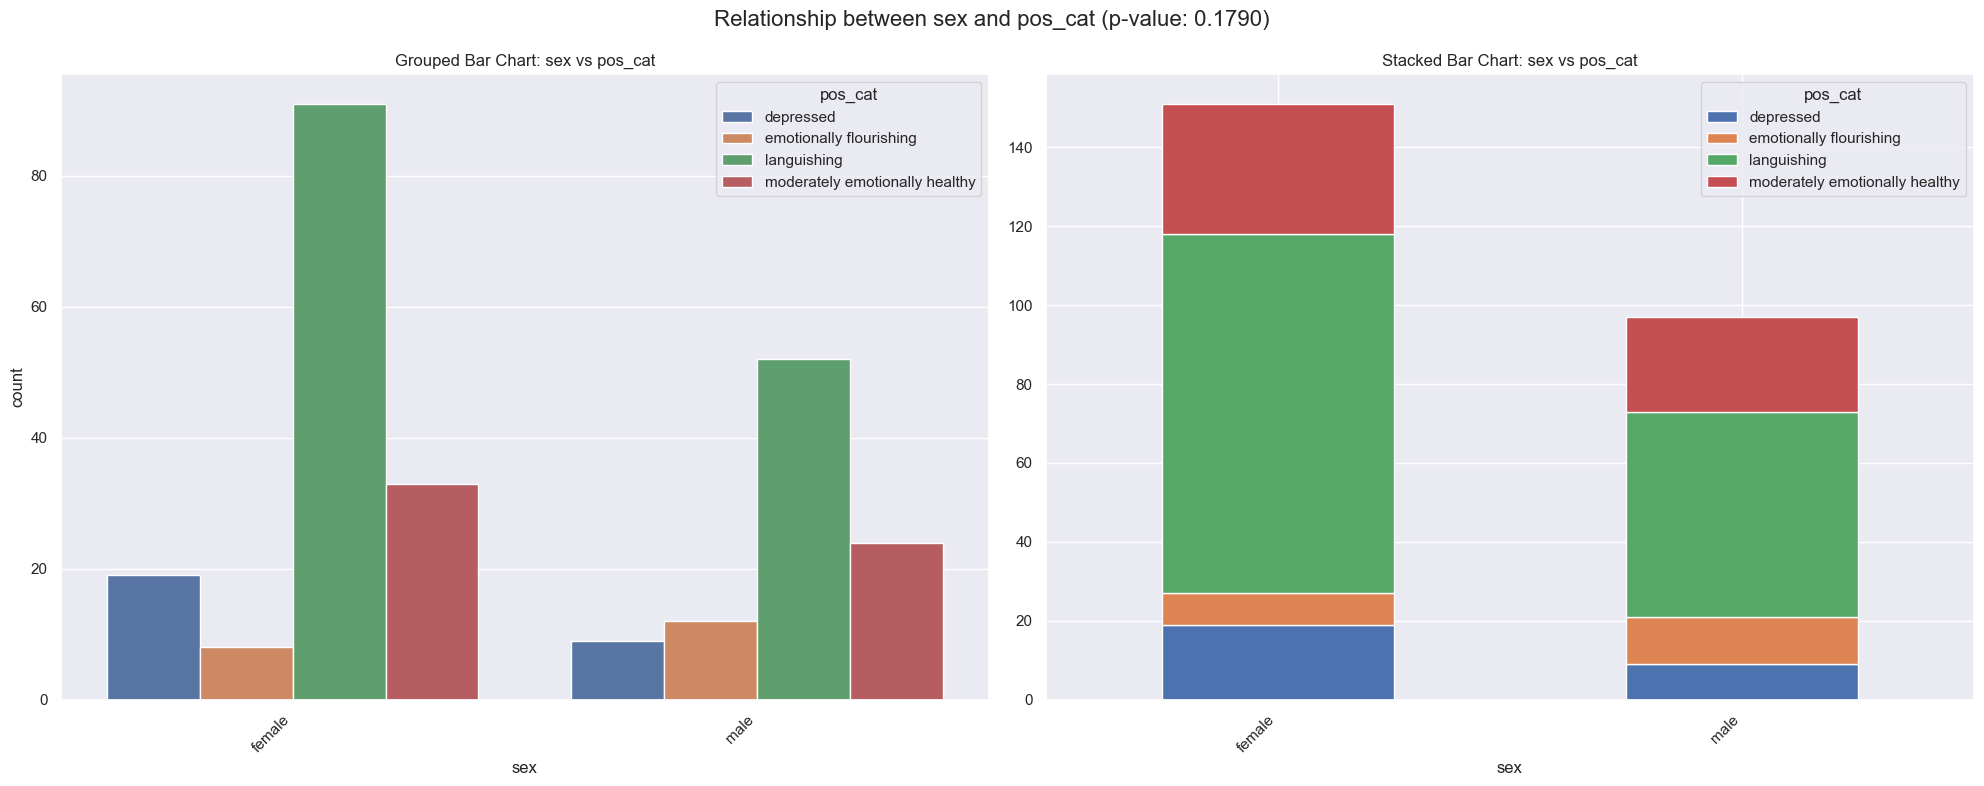

Completed plot 7 of 6


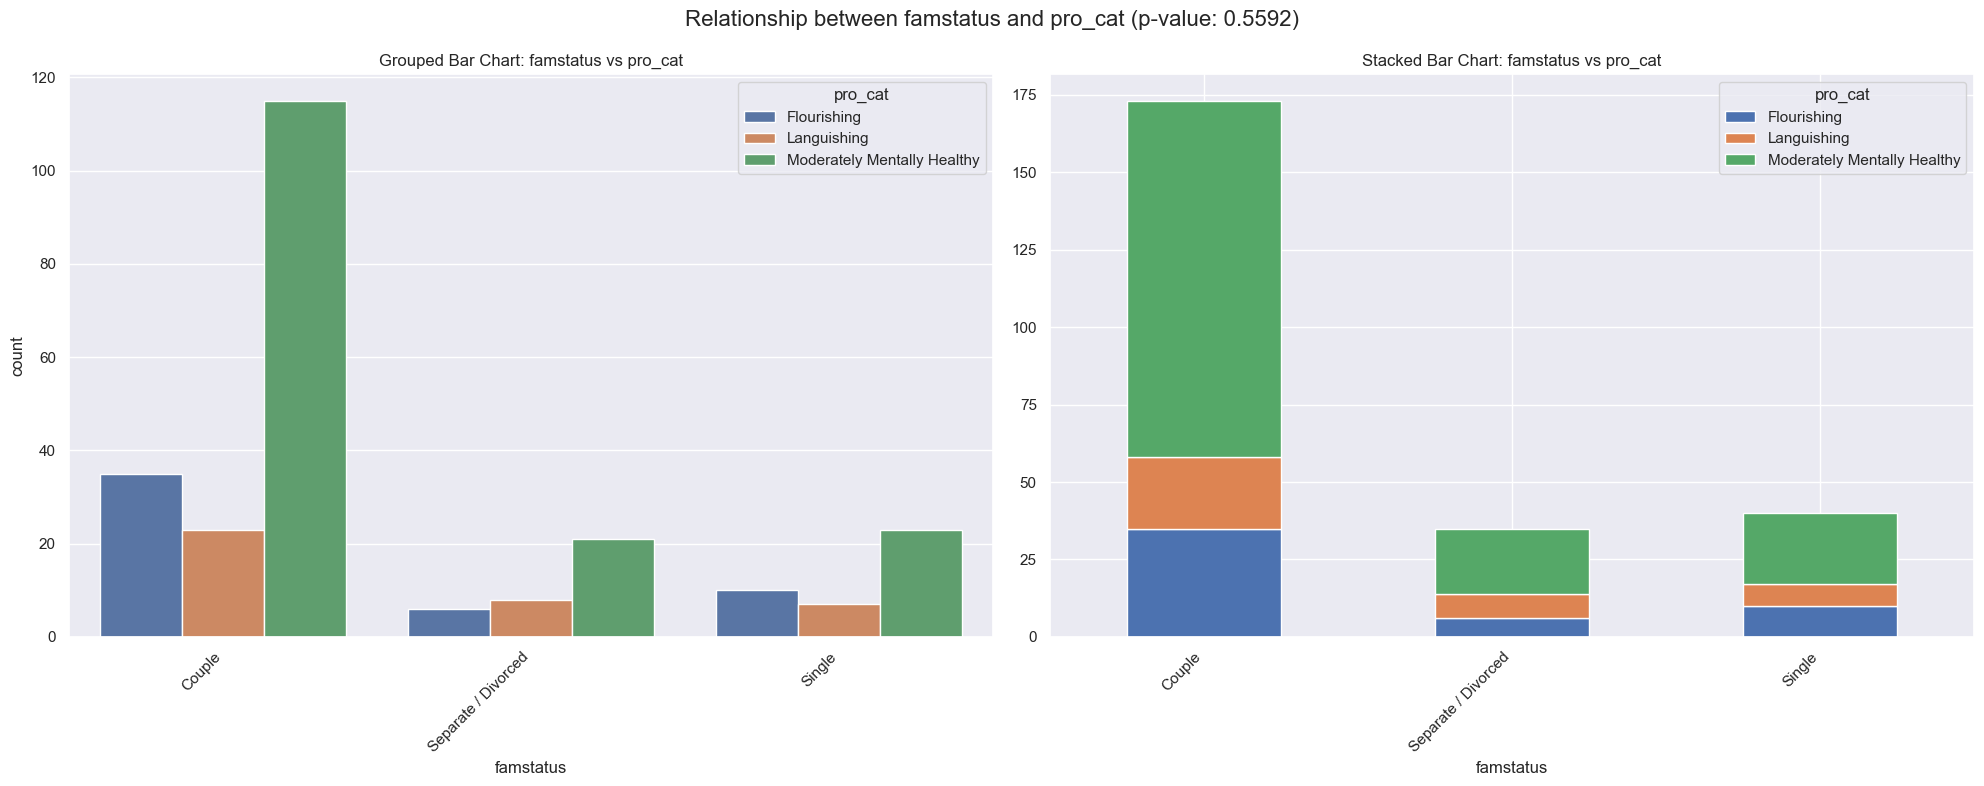

Completed plot 8 of 6


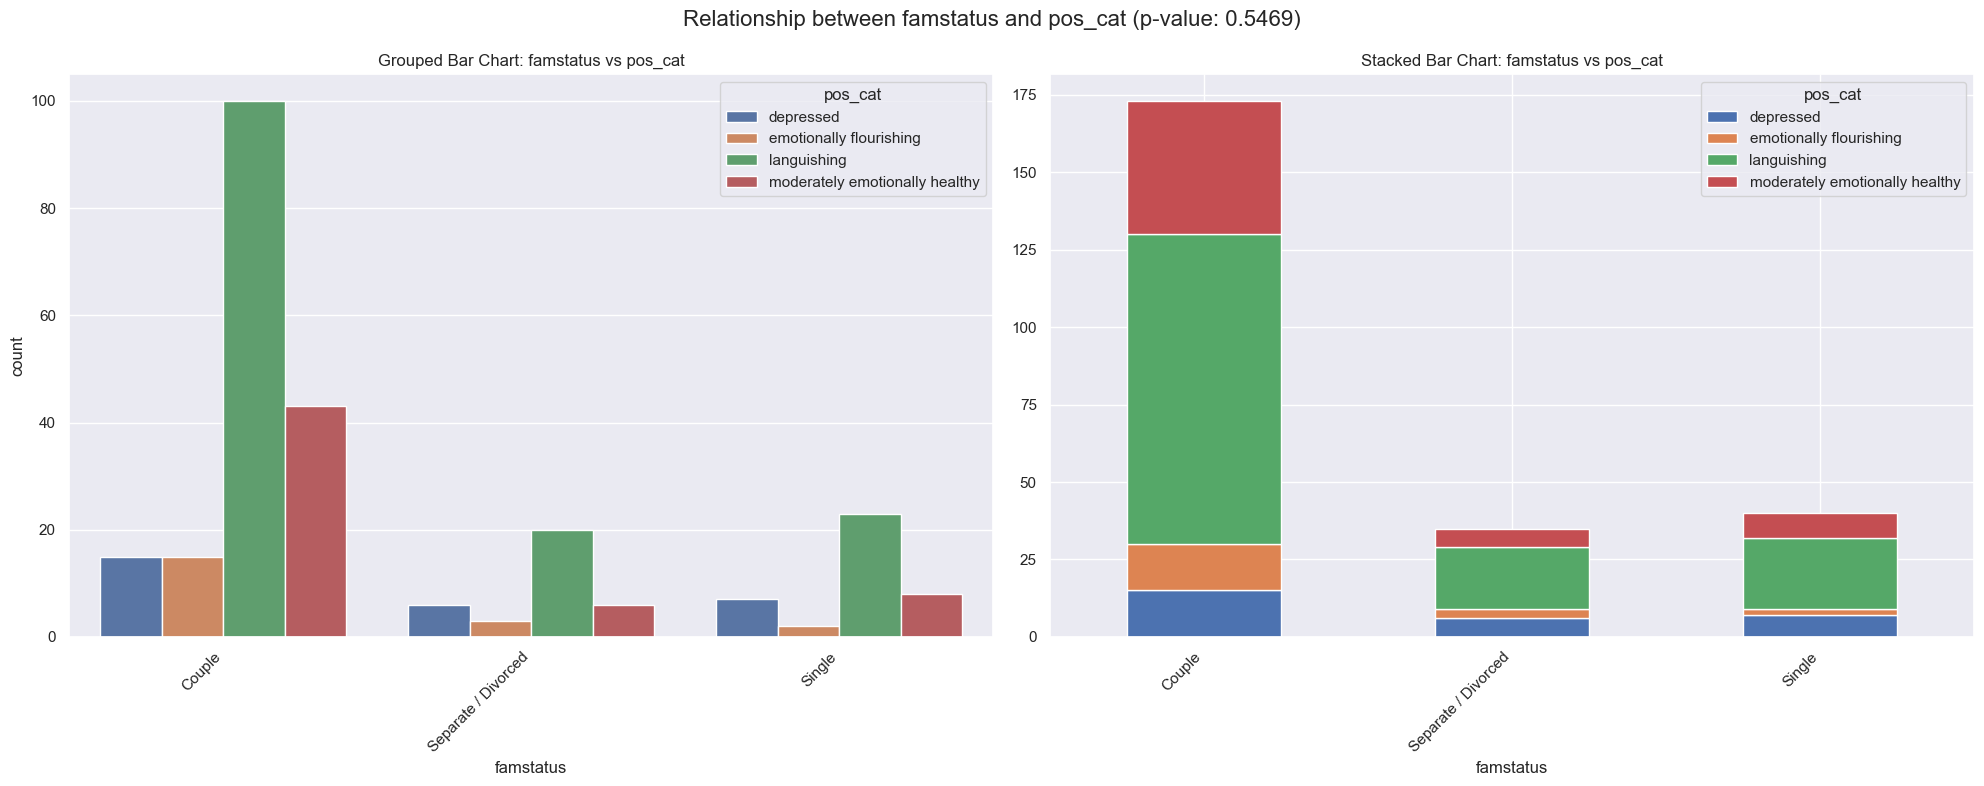

Completed plot 9 of 6


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i, item in enumerate(non_significant_list):
    contingency_df, var1, var2, pvalue = item
    
    # Reset index to make sure we have a proper DataFrame
    contingency_df = contingency_df.reset_index()
    
    # Melt the DataFrame to long format
    melted_df = pd.melt(contingency_df, id_vars=var1, var_name=var2, value_name='count')
    
    # Ensure the 'count' column is numeric
    melted_df['count'] = pd.to_numeric(melted_df['count'], errors='coerce')
    
    # Drop any rows with NaN values
    melted_df = melted_df.dropna()
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Grouped bar chart
    sns.barplot(x=var1, y='count', hue=var2, data=melted_df, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_title(f'Grouped Bar Chart: {var1} vs {var2}')
    
    # Stacked bar chart
    pivot_data = melted_df.pivot(index=var1, columns=var2, values='count')
    pivot_data.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title(f'Stacked Bar Chart: {var1} vs {var2}')
    
    # Add overall title with p-value
    plt.suptitle(f'Relationship between {var1} and {var2} (p-value: {pvalue:.4f})', fontsize=16)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust for the overall title
    plt.show()
    
    print(f"Completed plot {i+1} of {len(siginicant_list)}")